In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
plt.rcParams["figure.figsize"] = 25,7
import seaborn as sns
import os
import numpy as np

In [27]:
PATH = "C:\Dataton_2023\DATATON - MINSA 2023\Cancer dataton\Tablas"
List_files = os.listdir(PATH)
List_files

['Copia de Poblacion_EESS.xlsx',
 'DATA ATENCIONES ONCOLOGICAS 2022.csv',
 'SD_ENFERMEDADES_ONCOLOGICAS_ATENCIONES_TELEMEDICINA.csv',
 'TB_DIGTEL_CANCER_ATENCIONES.csv',
 'TB_DIGTEL_CANCER_ATENDIDOS.csv',
 'TB_DIGTEL_CANCER_ESTADIOS.csv',
 'TB_DIGTEL_CANCER_PROCEDIMIENTOS.csv',
 'TB_DIGTEL_CANCER_TAMIZAJE.csv',
 'TB_DIGTEL_CANCER_TRATAMIENTOS.csv',
 'Tiempos de espera.xlsx',
 'w_Codigos cáncer.xlsx',
 'x_Codigos cáncer.xlsx',
 'z_Codigos cáncer.xlsx',
 'z_Serv oncologicos a nivel NACIONAL.xlsx']

# TAMIZAJE

In [28]:
PATH7 = PATH + "\\" + List_files[7]
print("Leyndo archivo: ", PATH7)

tipos = {'id_persona': int,
         'Edad': int,
         'Tipo_edad': str,
         'Sexo': str,
         'id_ubigeo' : str,
         'Fecha_atencion': str,
         'Diagnostico': str,
         'Tipo_Dx': str,
         'id_eess' : str,
         'Etapa': str}

df_CANCER_TAMIZAJE = pd.read_csv(PATH7, dtype=tipos)
df_CANCER_TAMIZAJE["Fecha_atencion"] = pd.to_datetime(df_CANCER_TAMIZAJE["Fecha_atencion"], format="%Y%m%d")
df_CANCER_TAMIZAJE["Year"] = df_CANCER_TAMIZAJE["Fecha_atencion"].dt.year
df_CANCER_TAMIZAJE["Diagnostico"] = df_CANCER_TAMIZAJE["Diagnostico"].astype(str)

# sort by Fecha_atencion
df_CANCER_TAMIZAJE = df_CANCER_TAMIZAJE.sort_values(by=["Fecha_atencion"], ascending=True)

df_CANCER_TAMIZAJE.head(3)

Leyndo archivo:  C:\Dataton_2023\DATATON - MINSA 2023\Cancer dataton\Tablas\TB_DIGTEL_CANCER_TAMIZAJE.csv


,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,Etapa,Year
4148790,27099544,23,A,F,1353,2019-01-01,Z123,D,6031,18a-29a,2019
2443856,30738156,64,A,F,263,2019-01-01,Z123,D,2638,60a+,2019
2010239,13122478,39,A,F,1707,2019-01-01,88141.01,D,3175,30a-59a,2019


In [29]:
df_CANCER_TAMIZAJE["Tipo_Dx"].unique()

array(['D'], dtype=object)

# PROCEDIMIENTOS -  BIOPSIA

In [30]:
PATH7 = PATH + "\\" + List_files[6]
print("Leyndo archivo: ", PATH7)

tipos = {'id_persona': int,
         'Edad': int,
         'Tipo_edad': str,
         'Sexo': str,
         'id_ubigeo' : str,
         'Fecha_atencion': str,
         'Etapa': str,
         'Diagnostico': str,
         'Tipo_Dx': str,
         'id_eess' : str}

# read first 5 rows
df_CANCER_PROCEDIMIENTOS = pd.read_csv(PATH7, dtype = tipos)
df_CANCER_PROCEDIMIENTOS["Fecha_atencion"] = pd.to_datetime(df_CANCER_PROCEDIMIENTOS["Fecha_atencion"], format="%Y%m%d")
df_CANCER_PROCEDIMIENTOS["Year"] = df_CANCER_PROCEDIMIENTOS["Fecha_atencion"].dt.year
df_CANCER_PROCEDIMIENTOS["Diagnostico"] = df_CANCER_PROCEDIMIENTOS["Diagnostico"].astype(str)

# sort by Fecha_atencion
df_CANCER_PROCEDIMIENTOS = df_CANCER_PROCEDIMIENTOS.sort_values(by=["Fecha_atencion"], ascending=True)

df_CANCER_PROCEDIMIENTOS = df_CANCER_PROCEDIMIENTOS[df_CANCER_PROCEDIMIENTOS["Tipo_Dx"].isin(['D', 'd'])]

df_CANCER_PROCEDIMIENTOS.head(5)

Leyndo archivo:  C:\Dataton_2023\DATATON - MINSA 2023\Cancer dataton\Tablas\TB_DIGTEL_CANCER_PROCEDIMIENTOS.csv


,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Etapa,Diagnostico,Tipo_Dx,id_eess,Year
24850810,24202953,13,A,M,156,2019-01-01,12a-17a,99401,D,1831,2019
58891262,36730800,50,A,F,690,2019-01-01,30a-59a,99401,D,15655,2019
36299919,7804935,71,A,F,464,2019-01-01,60a+,99401,D,3583,2019
44275093,32023230,24,A,M,485,2019-01-01,18a-29a,99402.08,D,3777,2019
53704007,20016571,10,A,F,618,2019-01-01,00a-11a,99404,D,7467,2019


In [31]:
df_CANCER_PROCEDIMIENTOS["Tipo_Dx"].unique()

array(['D', 'd'], dtype=object)

# ATENDIDOS

In [32]:
PATH5 = PATH + "\\" + List_files[4]
print("Abriendo archivo: ", PATH5)

tipos = {'ï»¿id_persona': int,
         'Edad': int,
         'Tipo_edad': str,
         'Sexo': str,
         'id_ubigeo' : str,
         'Fecha_atencion': str,
         'Etapa': str,
         'Diagnostico': str,
         'Tipo_Dx': str,
         'id_eess' : str,}

df_CANCER_ATENDIDOS = pd.read_csv(PATH5, dtype = tipos, sep=',', encoding='latin-1')
df_CANCER_ATENDIDOS["Fecha_atencion"] = pd.to_datetime(df_CANCER_ATENDIDOS["Fecha_atencion"], format="%Y%m%d")
df_CANCER_ATENDIDOS["Year"] = df_CANCER_ATENDIDOS["Fecha_atencion"].dt.year
df_CANCER_ATENDIDOS["Diagnostico"] = df_CANCER_ATENDIDOS["Diagnostico"].astype(str)

# sort by Fecha_atencion
df_CANCER_ATENDIDOS = df_CANCER_ATENDIDOS.sort_values(by=["Fecha_atencion"], ascending=True)

df_CANCER_ATENDIDOS.columns = ['id_persona', 'Edad', 'Tipo_edad', 'Sexo', 'id_ubigeo', 'Fecha_atencion', 'Diagnostico', 'Tipo_Dx', 'id_eess', 'Etapa', 'Year']

df_CANCER_ATENDIDOS.head(5)

Abriendo archivo:  C:\Dataton_2023\DATATON - MINSA 2023\Cancer dataton\Tablas\TB_DIGTEL_CANCER_ATENDIDOS.csv


,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,Etapa,Year
395876,33592321,6,A,M,1719,2019-01-01,C459,D,3297,00a-11a,2019
419055,17522277,85,A,M,659,2019-01-01,C300,D,4486,60a+,2019
234221,36716199,82,A,M,563,2019-01-01,C61X,D,4652,60a+,2019
284301,20908554,39,A,F,346,2019-01-01,C112,D,23488,30a-59a,2019
435905,35901931,64,A,F,1247,2019-01-01,C541,D,4329,60a+,2019


In [33]:
df_CANCER_ATENDIDOS["Tipo_Dx"].unique()

array(['D', 'd'], dtype=object)

# TRATAMIENTO

In [34]:
PATH8 = PATH + "\\" + List_files[8]
print("Leyendo archivo: ", PATH8)

tipos = {'id_persona': int,
         'id_eess' : str,
         'Edad': int,
         'Tipo_edad': str,
         'Sexo': str,
         'id_ubigeo' : str,
         'Fecha_atencion': str,
         'Etapa': str,
         'Diagnostico': str,
         'Tipo_Dx': str,
         }

df_CANCER_TRATAMIENTOS = pd.read_csv(PATH8, dtype=tipos, sep=',', encoding='latin-1')
df_CANCER_TRATAMIENTOS["Fecha_atencion"] = pd.to_datetime(df_CANCER_TRATAMIENTOS["Fecha_atencion"], format="%Y%m%d")
df_CANCER_TRATAMIENTOS["Year"] = df_CANCER_TRATAMIENTOS["Fecha_atencion"].dt.year
df_CANCER_ATENDIDOS["Diagnostico"] = df_CANCER_ATENDIDOS["Diagnostico"].astype(str)

# sort by Fecha_atencion
df_CANCER_TRATAMIENTOS = df_CANCER_TRATAMIENTOS.sort_values(by=["Fecha_atencion"], ascending=True)

df_CANCER_TRATAMIENTOS.columns = ['id_persona', 'id_eess', 'Edad', 'Tipo_edad', 'Sexo', 'id_ubigeo', 'Fecha_atencion', 'Etapa', 'Diagnostico', 'Tipo_Dx', 'Year']

df_CANCER_TRATAMIENTOS = df_CANCER_TRATAMIENTOS[df_CANCER_TRATAMIENTOS["Tipo_Dx"].isin(['D'])]

df_CANCER_TRATAMIENTOS.head(5)

Leyendo archivo:  C:\Dataton_2023\DATATON - MINSA 2023\Cancer dataton\Tablas\TB_DIGTEL_CANCER_TRATAMIENTOS.csv


,id_persona,id_eess,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Etapa,Diagnostico,Tipo_Dx,Year
10980,1874154,3,60,A,F,1463,2019-01-02,60a+,96421,D,2019
10981,1012017,3,65,A,F,1453,2019-01-02,60a+,96421,D,2019
57631,36823044,5943,24,A,F,1291,2019-01-02,18a-29a,96410,D,2019
3422,41476283,753,44,A,F,1036,2019-01-02,30a-59a,96410,D,2019
16337,3019936,5943,66,A,M,1358,2019-01-02,60a+,96410,D,2019


In [35]:
df_CANCER_TRATAMIENTOS["Tipo_Dx"].unique()

array(['D'], dtype=object)

# Códigos cancer

In [36]:
PATH1 = PATH + "\\" + List_files[-4]
print(PATH1)
# get name of sheets
xls = pd.ExcelFile(PATH1)
sheets = xls.sheet_names
sheets

C:\Dataton_2023\DATATON - MINSA 2023\Cancer dataton\Tablas\w_Codigos cáncer.xlsx


['Todos CA',
 'Colon y recto',
 'Prostata',
 'Piel',
 'Pulmón',
 'Higado',
 'Ganglio',
 'Médula ósea',
 'Mama',
 'Cérvix',
 'Indicadores',
 'Contactos',
 'Normativa MAMA',
 'Normativa CERVIX']

In [57]:
PATH1 = PATH + "\\" + List_files[-4]
print(PATH1)
# no headers
df_codigos_cancer_mama = pd.read_excel(PATH1, sheet_name = "Colon y recto", header=None)
df_codigos_cancer_mama = df_codigos_cancer_mama.iloc[:,3:]
# FORWARD FILL with last valid observation
df_codigos_cancer_mama = df_codigos_cancer_mama.fillna(method='ffill')

df_codigos_cancer_mama = df_codigos_cancer_mama.dropna()

df_codigos_cancer_mama = df_codigos_cancer_mama.drop_duplicates()

df_codigos_cancer_mama.columns = ["Procedimientos/Diagnósticos","Código CIE10","Etapa"]

df_codigos_cancer_mama = df_codigos_cancer_mama.set_index(["Etapa","Procedimientos/Diagnósticos"])
#df_Poblacion_EESS = df_Poblacion_EESS.sort_index()

df_codigos_cancer_mama["Código CIE10"] = df_codigos_cancer_mama["Código CIE10"].astype(str)



df_codigos_cancer_mama

C:\Dataton_2023\DATATON - MINSA 2023\Cancer dataton\Tablas\w_Codigos cáncer.xlsx


Código CIE10
Etapa       Procedimientos/Diagnósticos                                    
TAMIZAJE    Test Sangre Oculta en Heces.                              82270
BIOPSIA     Colonoscopía Con Biopsia.                                 44389
DIAGNOSTICO Tumor Maligno de la Unión Rectosigmoidea.                  C19X
            C20 Tumor Maligno del Recto.                                C20
            C180 Tumor Maligno del Ciego.                              C180
            C181 Tumor Maligno del Apéndice.                           C181
            C182 Tumor Maligno del Colon Ascendente.                   C182
            C183 Tumor Maligno del Angulo Hepático.                    C183
            C184 Tumor Maligno del Colon Transverso.                   C184
            C185 Tumor Maligno del Angulo Esplenico.                   C185
            C186 Tumor Maligno del Colon Descendente.                  C186
            C187 Tumor Maligno del Colon Sigmoide.                     C187
            C188 Lesión de Sitios Contiguos del Colon.                 C188
            C189 Tumor Maligno del Colon parte no especific...         C189
TRATAMIENTO Supervisión médica directa.                               90780
            96410 Administración de Quimioterapia Endovenos...        96410
            96421 Quimioterapia en Infusión (mayor a 4h)              96421
            96549 Otros tipos de Quimioterapia.                       96549
            77305 Radioterapia Externa.                               77305
            77501 Braquiterapia.                                      77501

In [38]:
def read_tabla_cancers(sheet_name):
    df_codigos = pd.read_excel(PATH1, sheet_name = sheet_name, header=None)
    df_codigos = df_codigos.iloc[:,3:]
    # FORWARD FILL with last valid observation
    df_codigos = df_codigos.fillna(method='ffill')

    df_codigos = df_codigos.dropna()

    df_codigos = df_codigos.drop_duplicates()

    df_codigos.columns = ["Procedimientos/Diagnósticos","Código CIE10","Etapa"]

    df_codigos = df_codigos.set_index(["Etapa","Procedimientos/Diagnósticos"])
    #df_Poblacion_EESS = df_Poblacion_EESS.sort_index()

    df_codigos["Código CIE10"] = df_codigos["Código CIE10"].astype(str)

    return df_codigos

In [108]:
def cdf_plot(df, a, b, c, sheet):

    df = df[(df["Fecha_atencion{}".format(c)].dt.year == 2023) & 
                            (df["Diferencia"].abs() <= 365) &
                            (df["Diferencia"] > 0)]

    df["Diferencia"].hist(bins=100, cumulative=True, density=1, histtype='step', linewidth=2)
    # calculate the percentage of patients that have a difference of 30 days or less, using the cdf function
    plt.axvline(x=60, color='red', linestyle='--')
    plt.axvline(x=90, color='red', linestyle='--')
    plt.title("{} - Función cumulativa entre entre fecha de {} y fecha de {} - promedio: {}".format(sheet, a,b, round(df["Diferencia"].mean(),1)))
    # safe figure at "C:\Dataton_2023\DATATON - MINSA 2023\Cancer dataton\Tablas\cdf_{}_{}_{}.png".format(sheet,a,b)
    plt.savefig("C:\Dataton_2023\DATATON - MINSA 2023\Cancer dataton\Tablas\PLOTS\cdf_{}_{}_{}.png".format(sheet,a,b))
    return plt.show()

In [97]:
sheets[1:-4]

['Colon y recto',
 'Prostata',
 'Piel',
 'Pulmón',
 'Higado',
 'Ganglio',
 'Médula ósea',
 'Mama',
 'Cérvix']

Abriendo sheet: Colon y recto
Index(['TAMIZAJE', 'BIOPSIA', 'DIAGNOSTICO', 'TRATAMIENTO'], dtype='object', name='Etapa')
{'TAMIZAJE': ['82270'], 'BIOPSIA': ['44389'], 'DIAGNOSTICO': ['C19X', 'C20', 'C180', 'C181', 'C182', 'C183', 'C184', 'C185', 'C186', 'C187', 'C188', 'C189'], 'TRATAMIENTO': ['90780', '96410', '96421', '96549', '77305', '77501']}
Etapa: TAMIZAJE
Etapa: BIOPSIA
Etapa: DIAGNOSTICO
Etapa: TRATAMIENTO


c:\Users\Amador\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


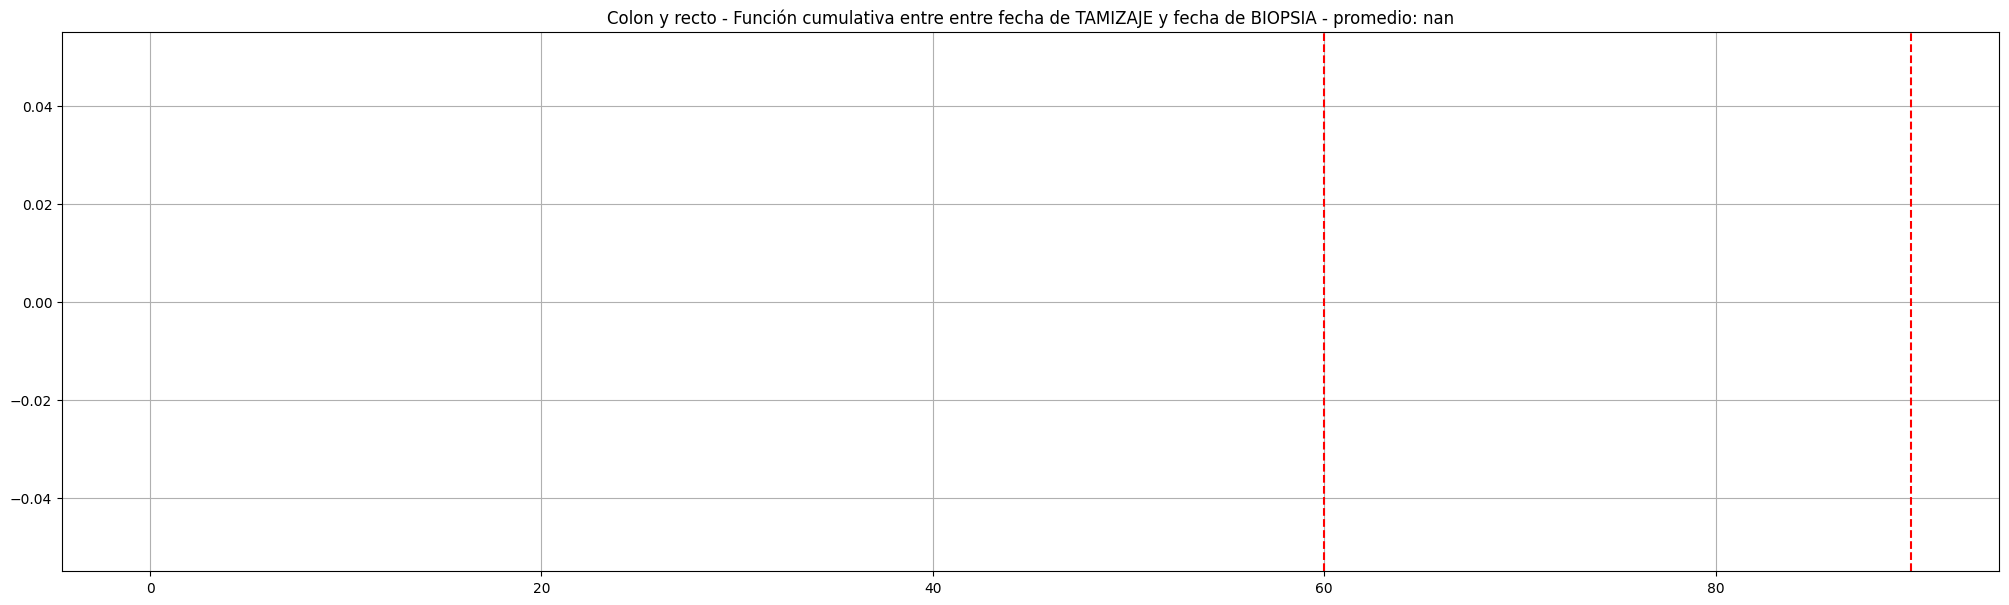

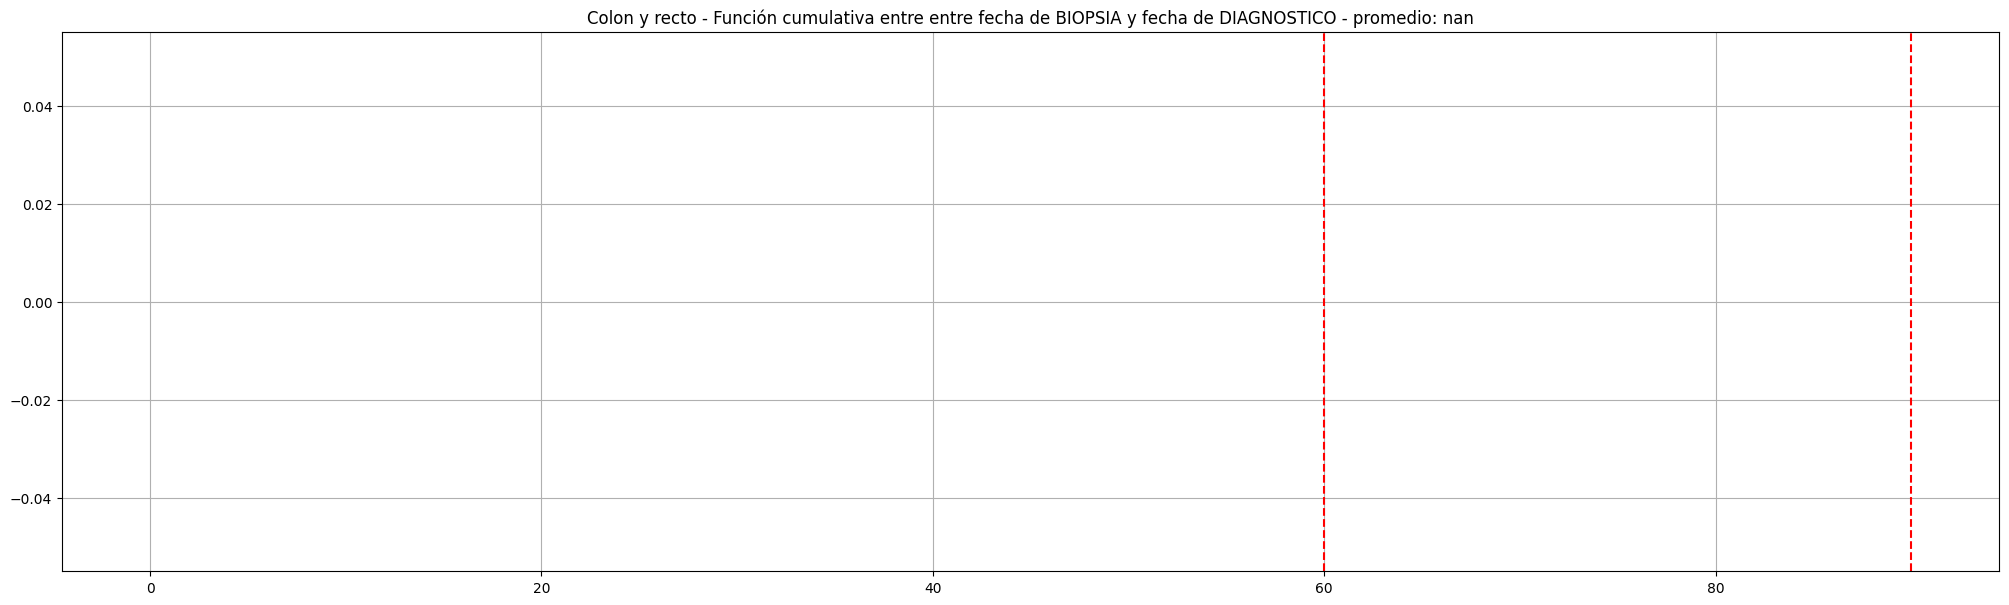

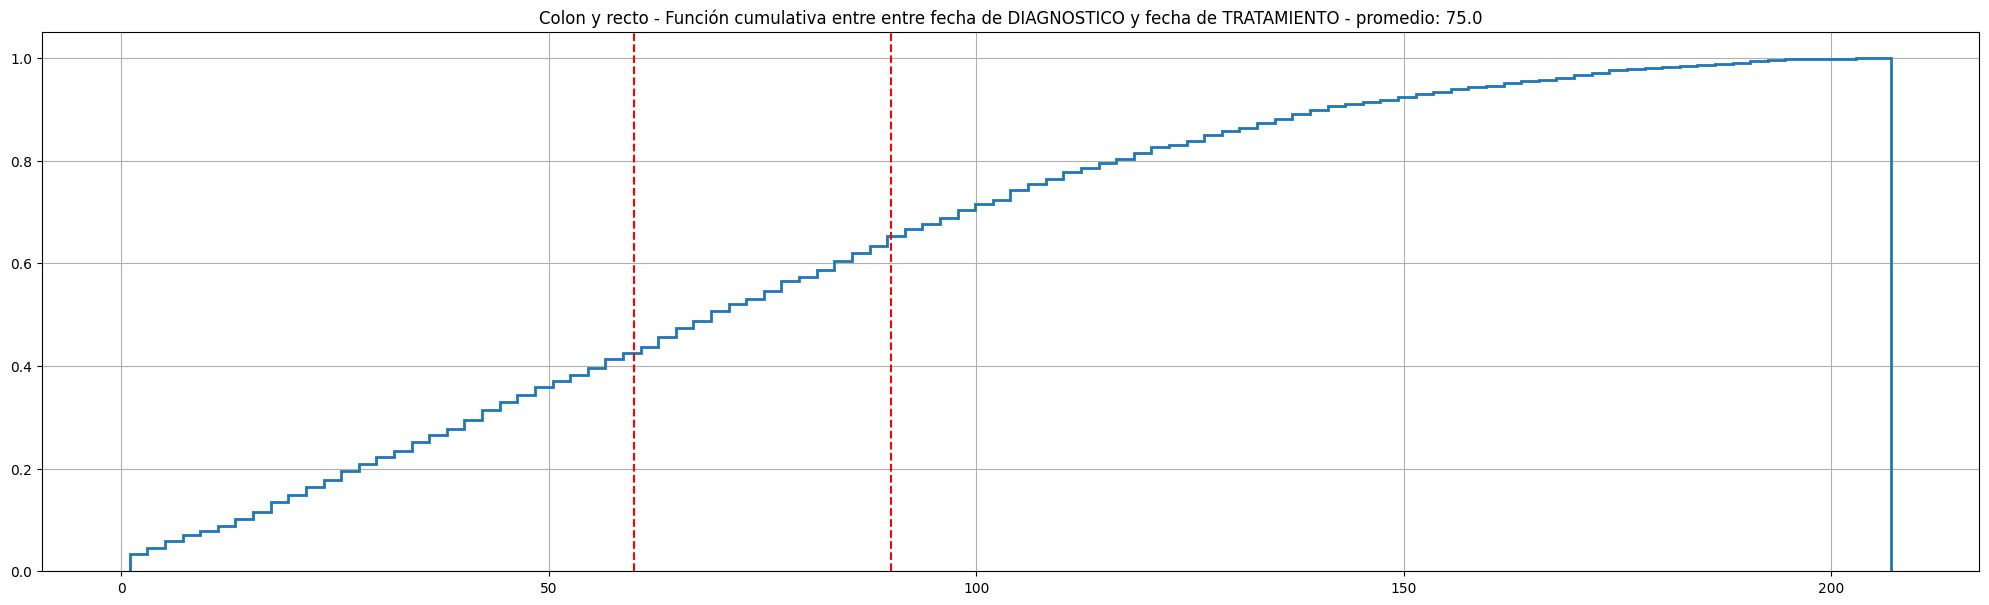

Abriendo sheet: Prostata
Index(['TAMIZAJE', 'BIOPSIA', 'DIAGNOSTICO', 'TRATAMIENTO'], dtype='object', name='Etapa')
{'TAMIZAJE': ['84152'], 'BIOPSIA': ['55700'], 'DIAGNOSTICO': ['C61X'], 'TRATAMIENTO': ['90780', '96410', '96421', '96549', '77305', '77501']}
Etapa: TAMIZAJE
Etapa: BIOPSIA
Etapa: DIAGNOSTICO
Etapa: TRATAMIENTO


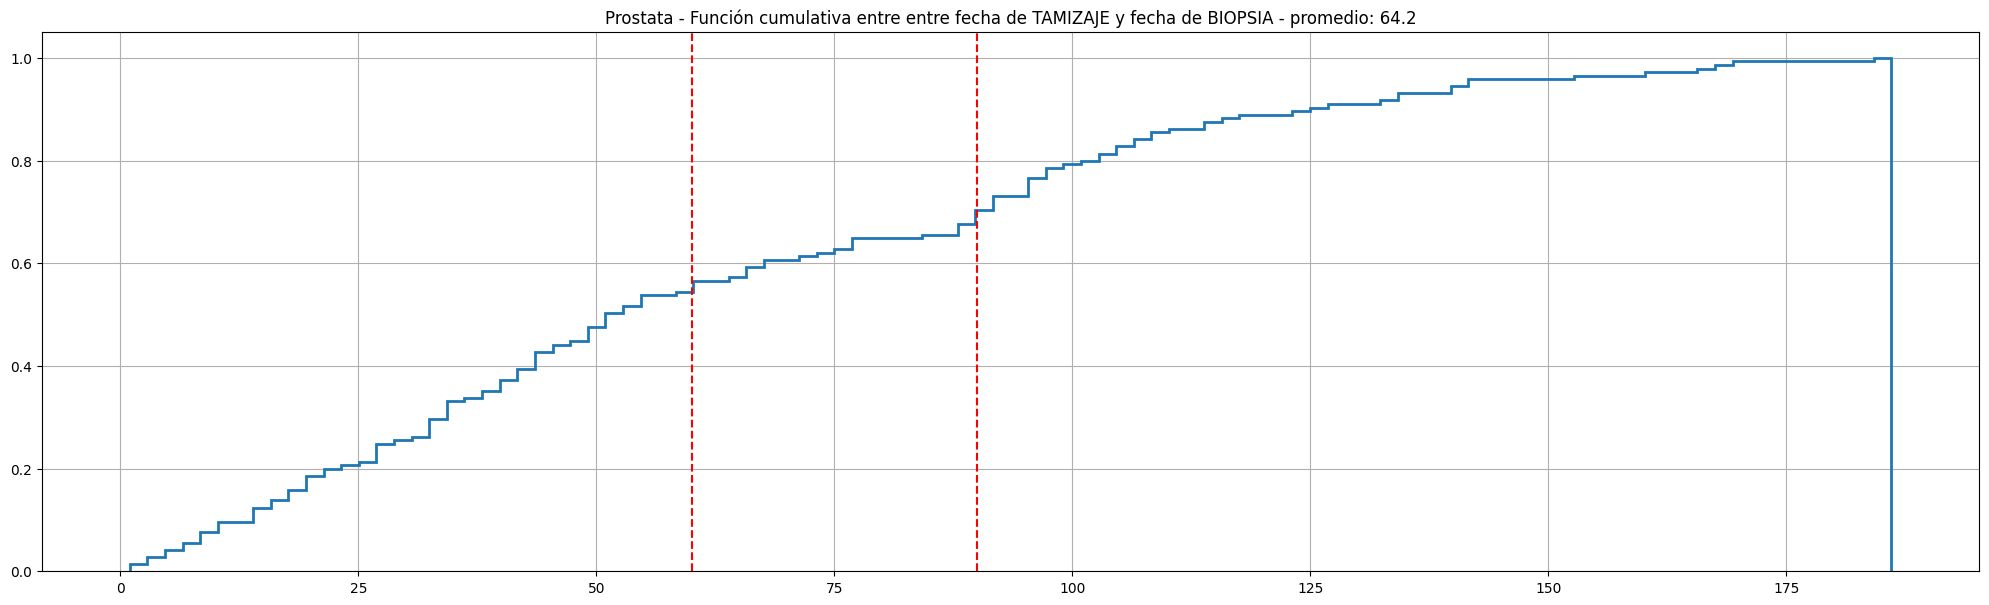

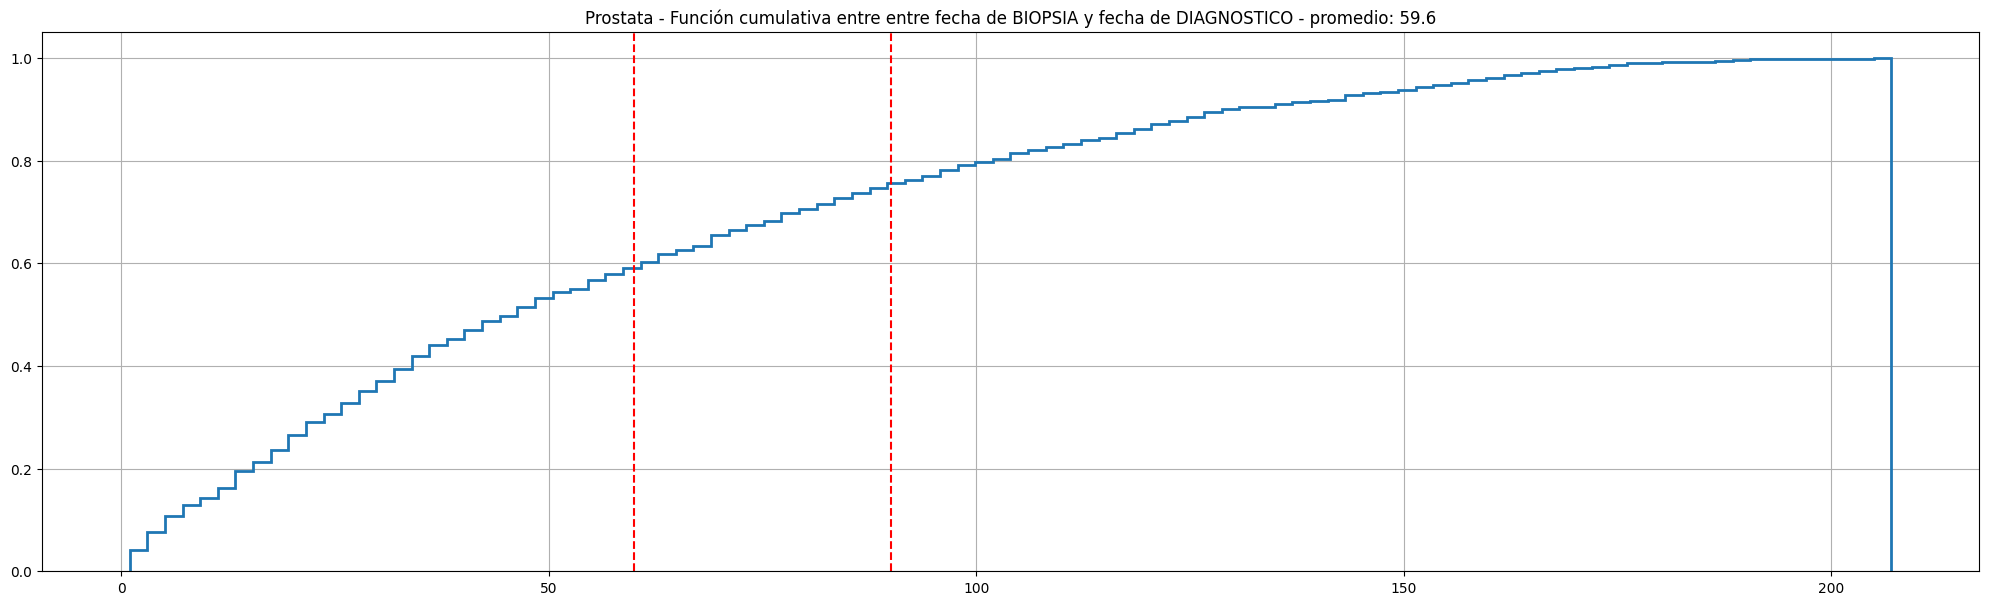

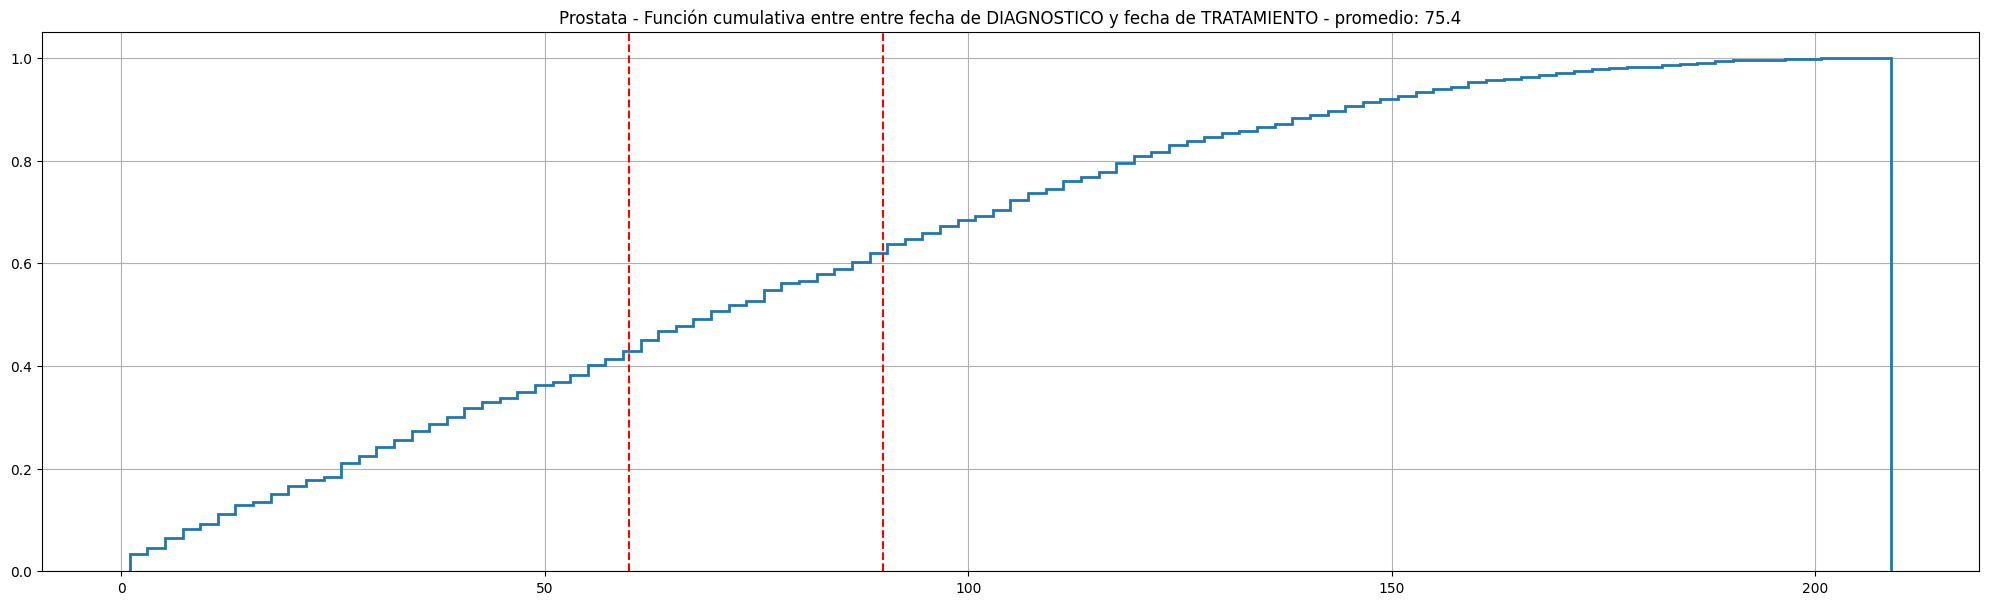

Abriendo sheet: Piel
Index(['TAMIZAJE', 'BIOPSIA', 'DIAGNOSTICO', 'TRATAMIENTO'], dtype='object', name='Etapa')
{'TAMIZAJE': ['Z128'], 'BIOPSIA': ['11100'], 'DIAGNOSTICO': ['C430', 'C431', 'C432', 'C433', 'C434', 'C435', 'C436', 'C437', 'C438', 'C439', 'C440', 'C441', 'C442', 'C443', 'C444', 'C445', 'C446', 'C447', 'C448', 'C449'], 'TRATAMIENTO': ['90780', '96410', '96421', '96549', '77305', '77501']}
Etapa: TAMIZAJE
Etapa: BIOPSIA
Etapa: DIAGNOSTICO
Etapa: TRATAMIENTO


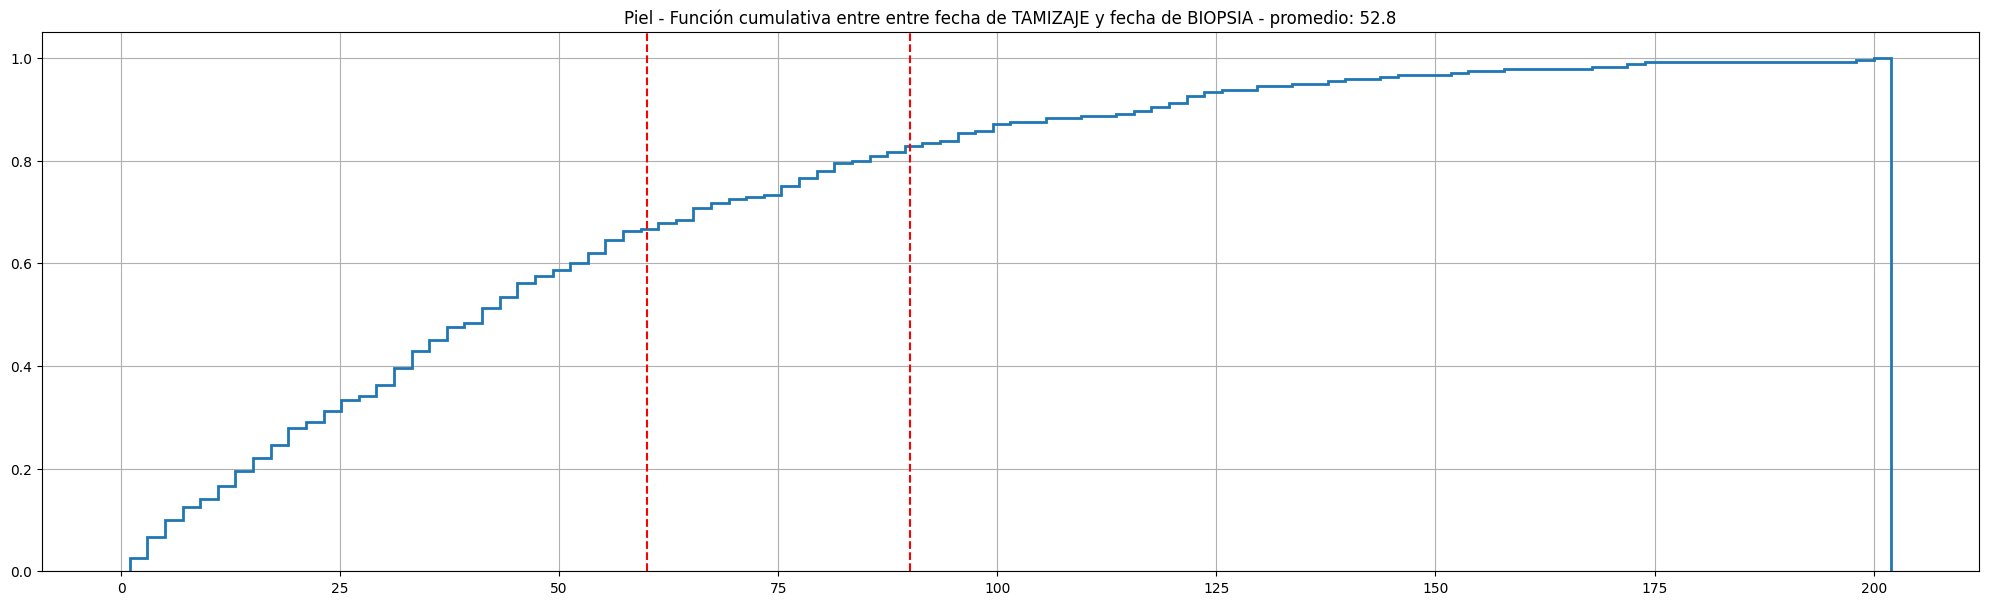

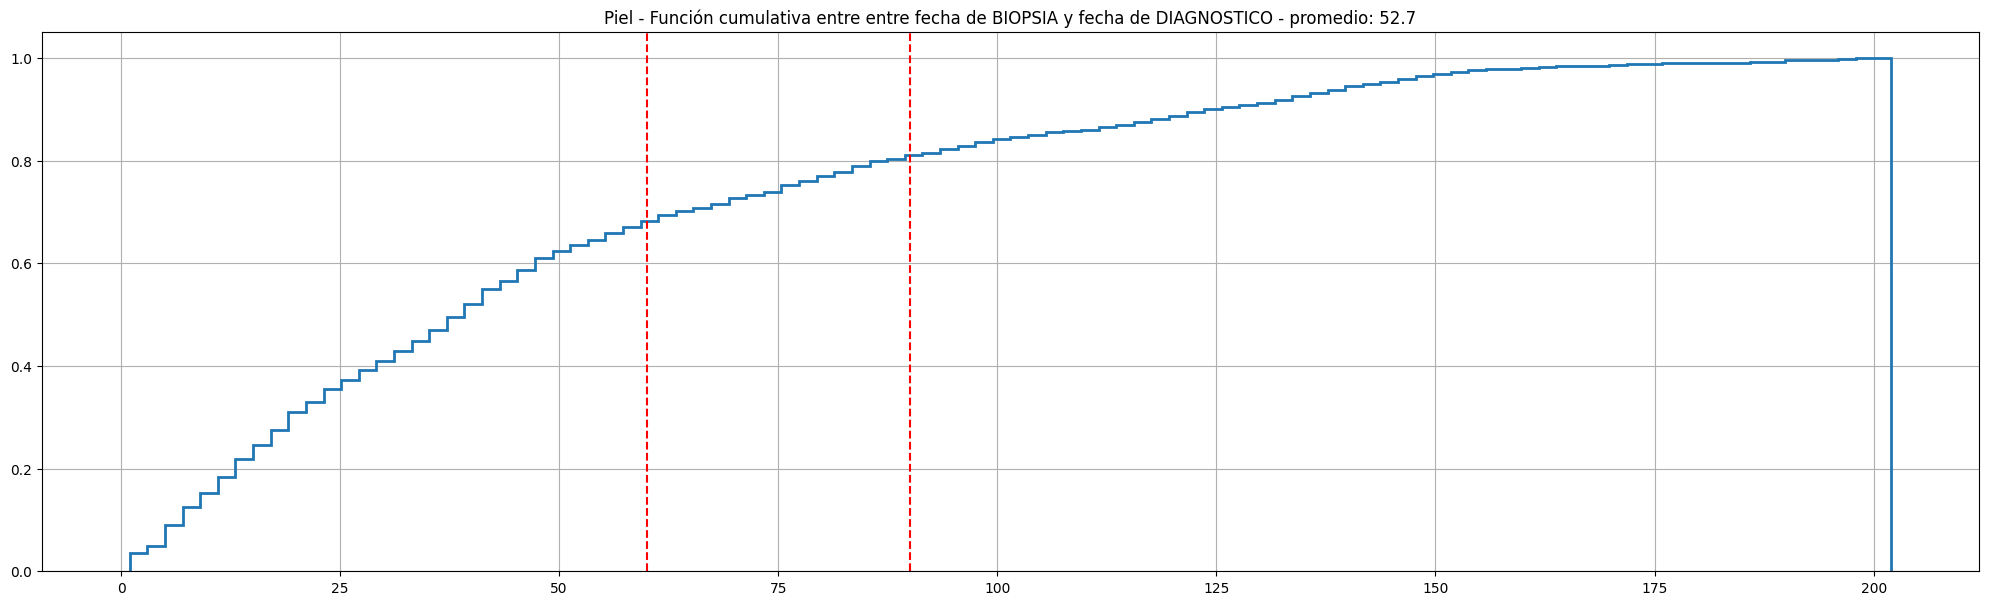

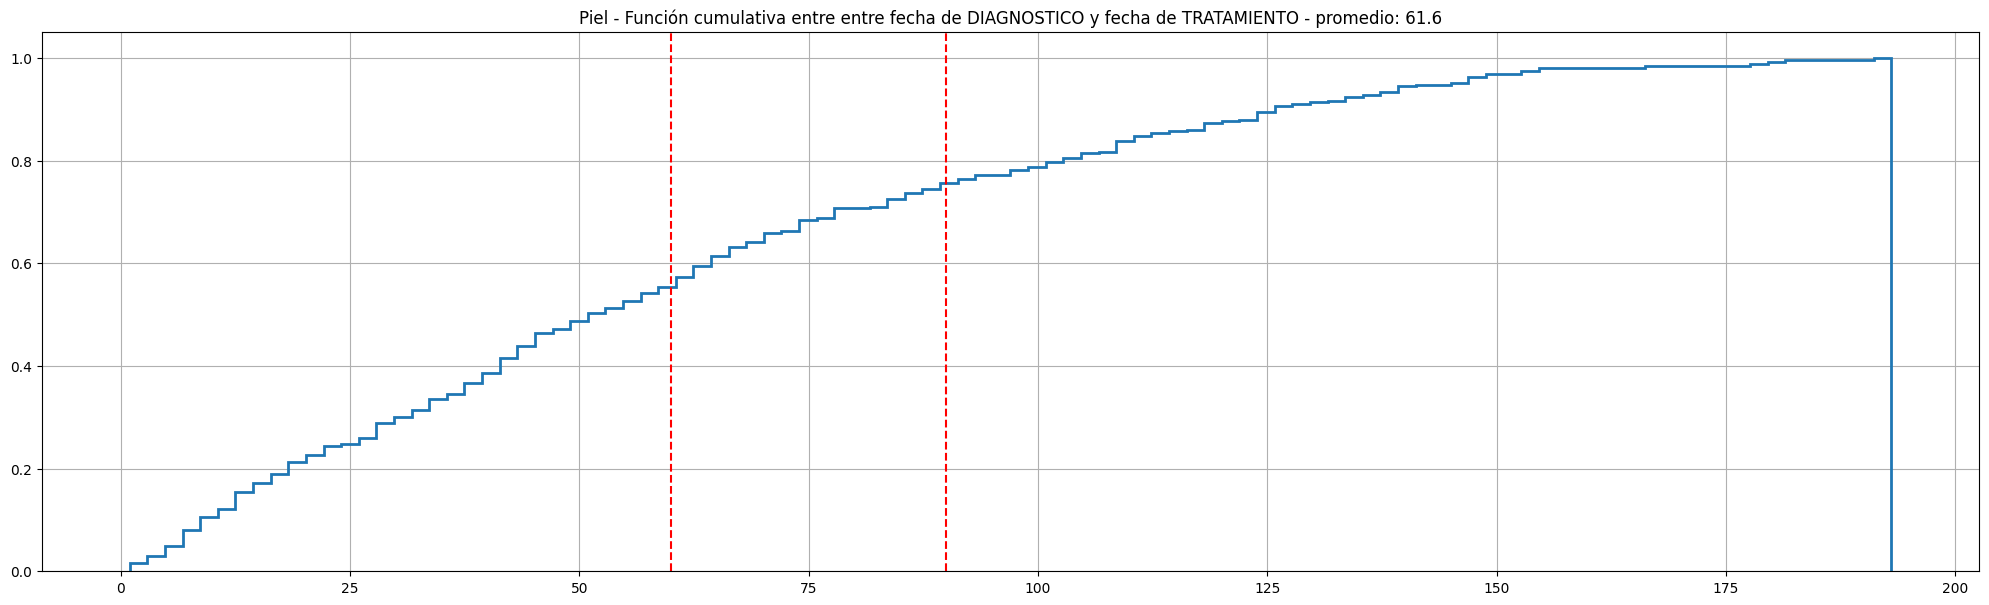

Abriendo sheet: Pulmón
Index(['BIOPSIA', 'DIAGNOSTICO', 'TRATAMIENTO'], dtype='object', name='Etapa')
{'BIOPSIA': ['32405', '32400'], 'DIAGNOSTICO': ['C340', 'C341', 'C342', 'C343', 'C348', 'C349'], 'TRATAMIENTO': ['90780', '96410', '96421', '96549', '77305', '77501']}
Etapa: BIOPSIA
Etapa: DIAGNOSTICO
Etapa: TRATAMIENTO


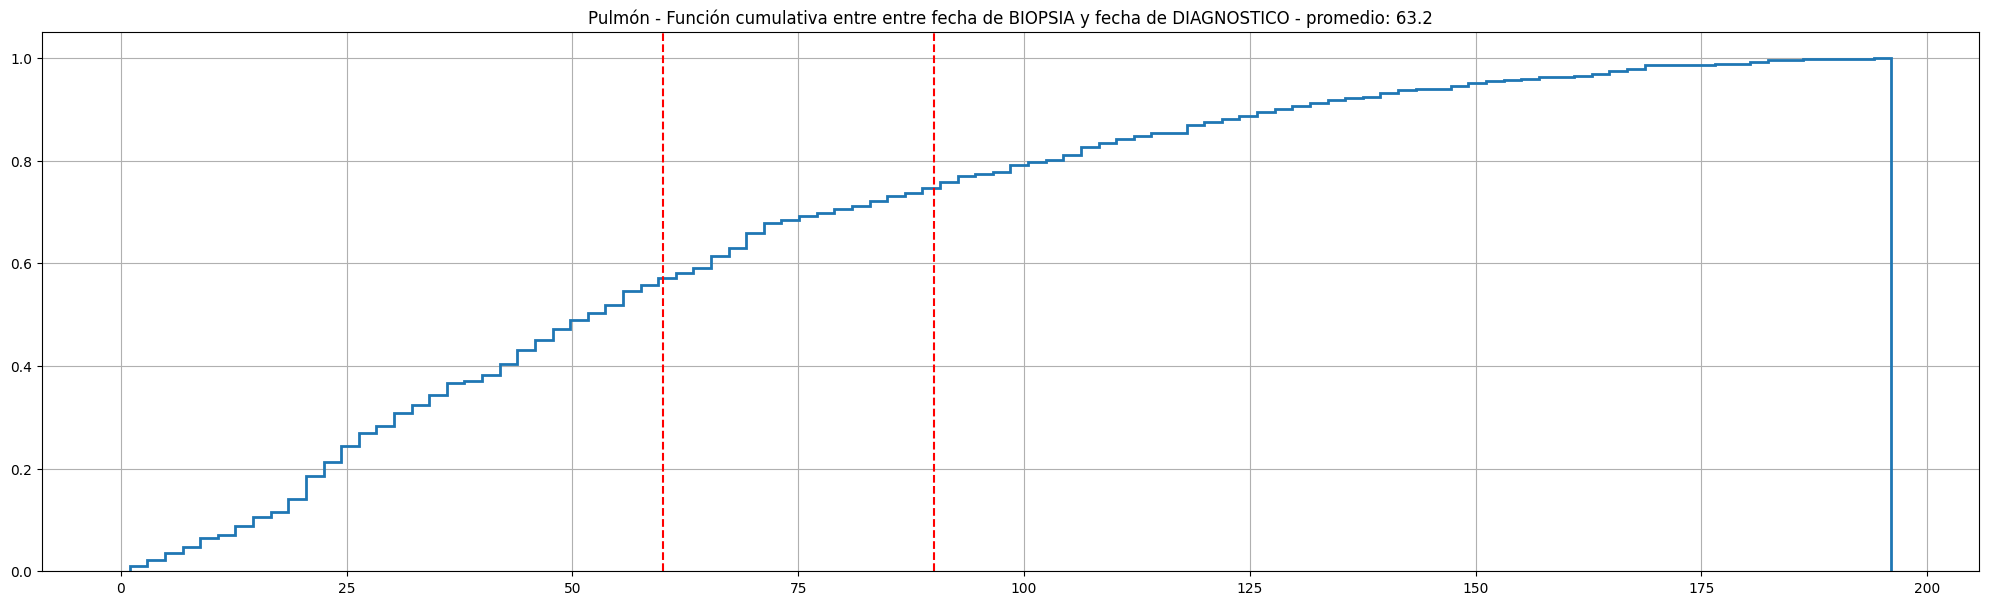

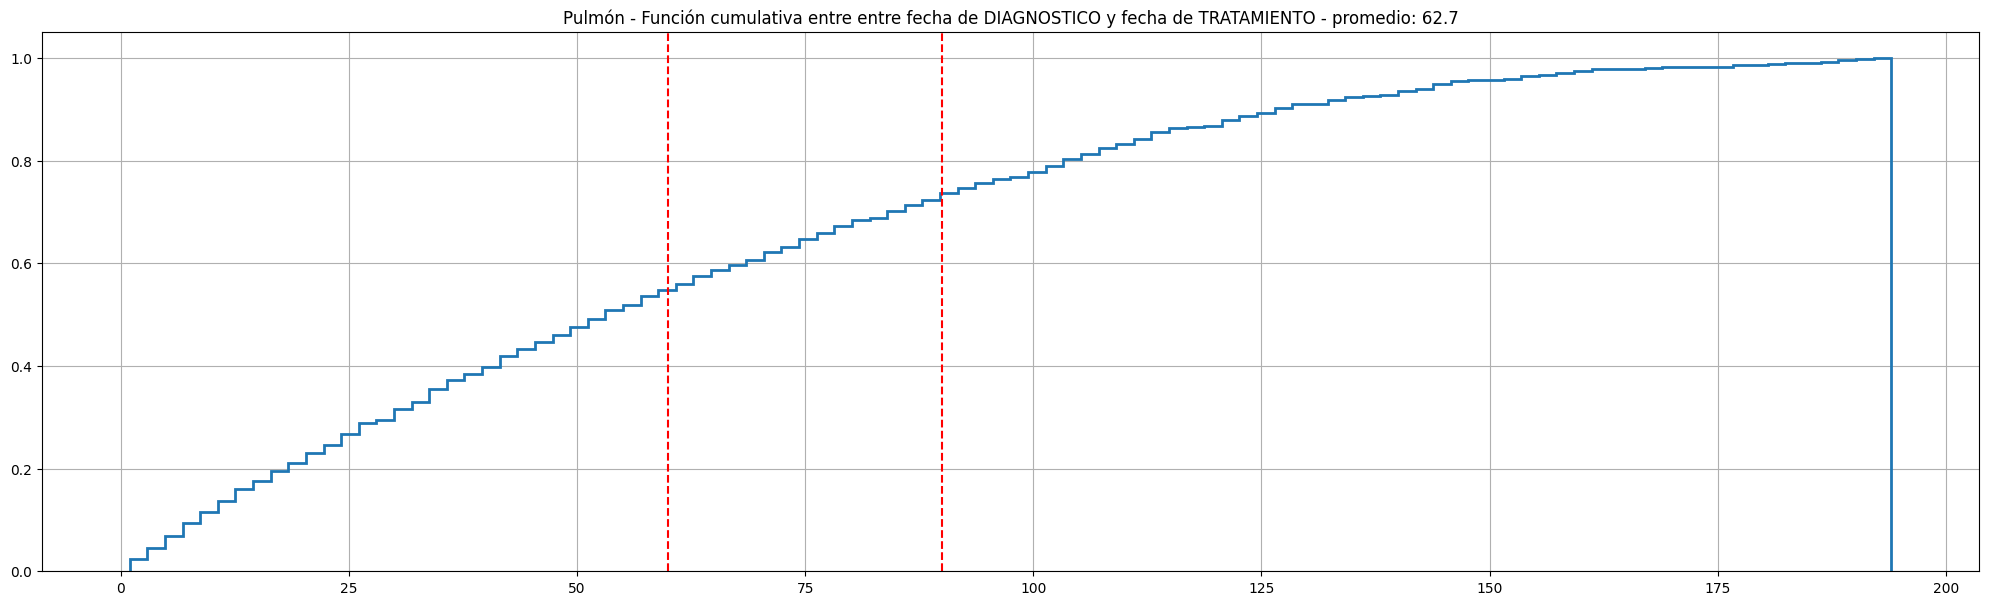

Abriendo sheet: Higado
Index(['BIOPSIA', 'DIAGNOSTICO', 'TRATAMIENTO'], dtype='object', name='Etapa')
{'BIOPSIA': ['47000'], 'DIAGNOSTICO': ['C220', 'C221', 'C222', 'C223', 'C224', 'C227', 'C229'], 'TRATAMIENTO': ['90780', '96410', '96421', '96549', '77305', '77501']}
Etapa: BIOPSIA
Etapa: DIAGNOSTICO
Etapa: TRATAMIENTO


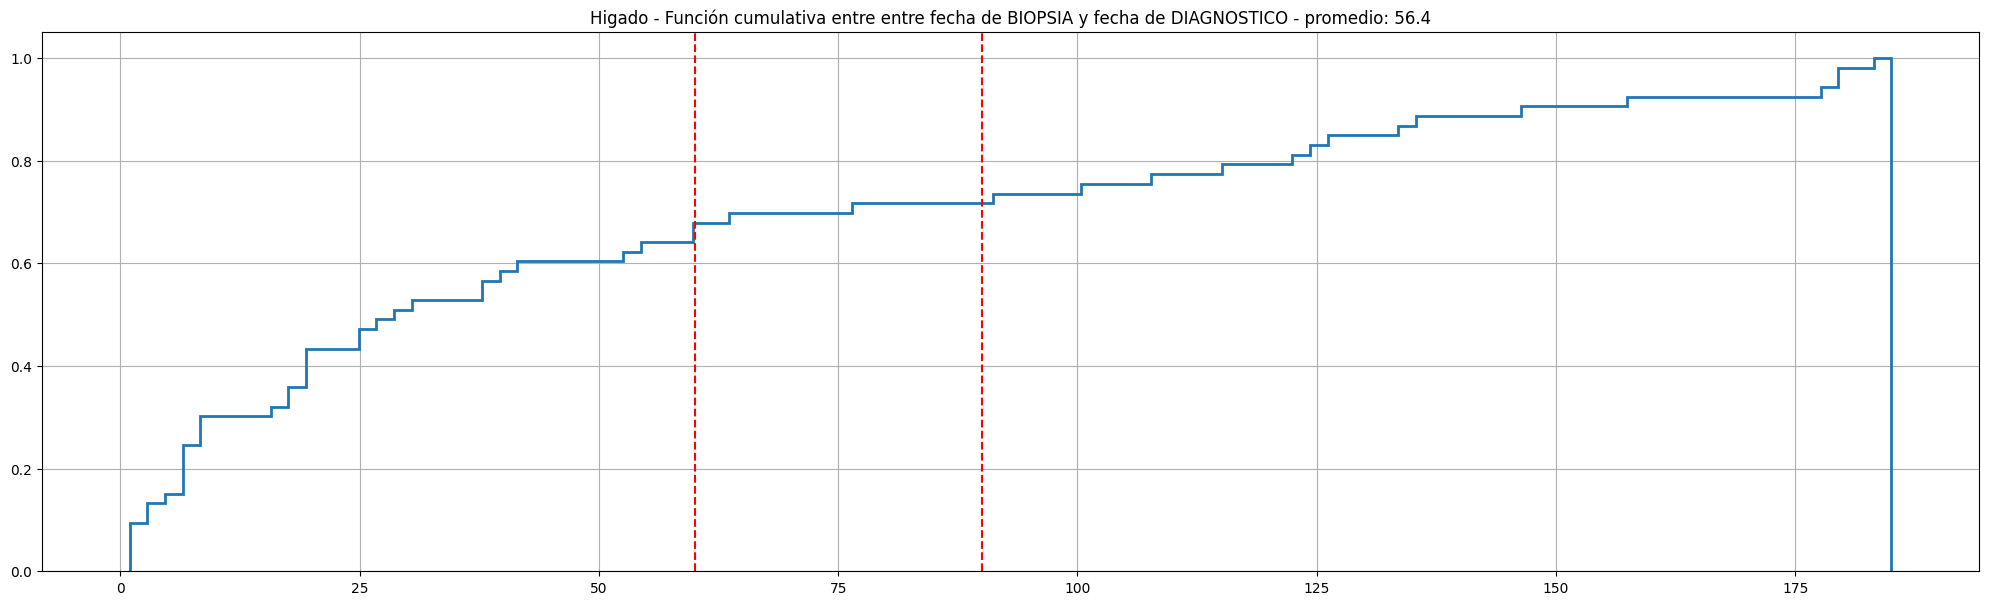

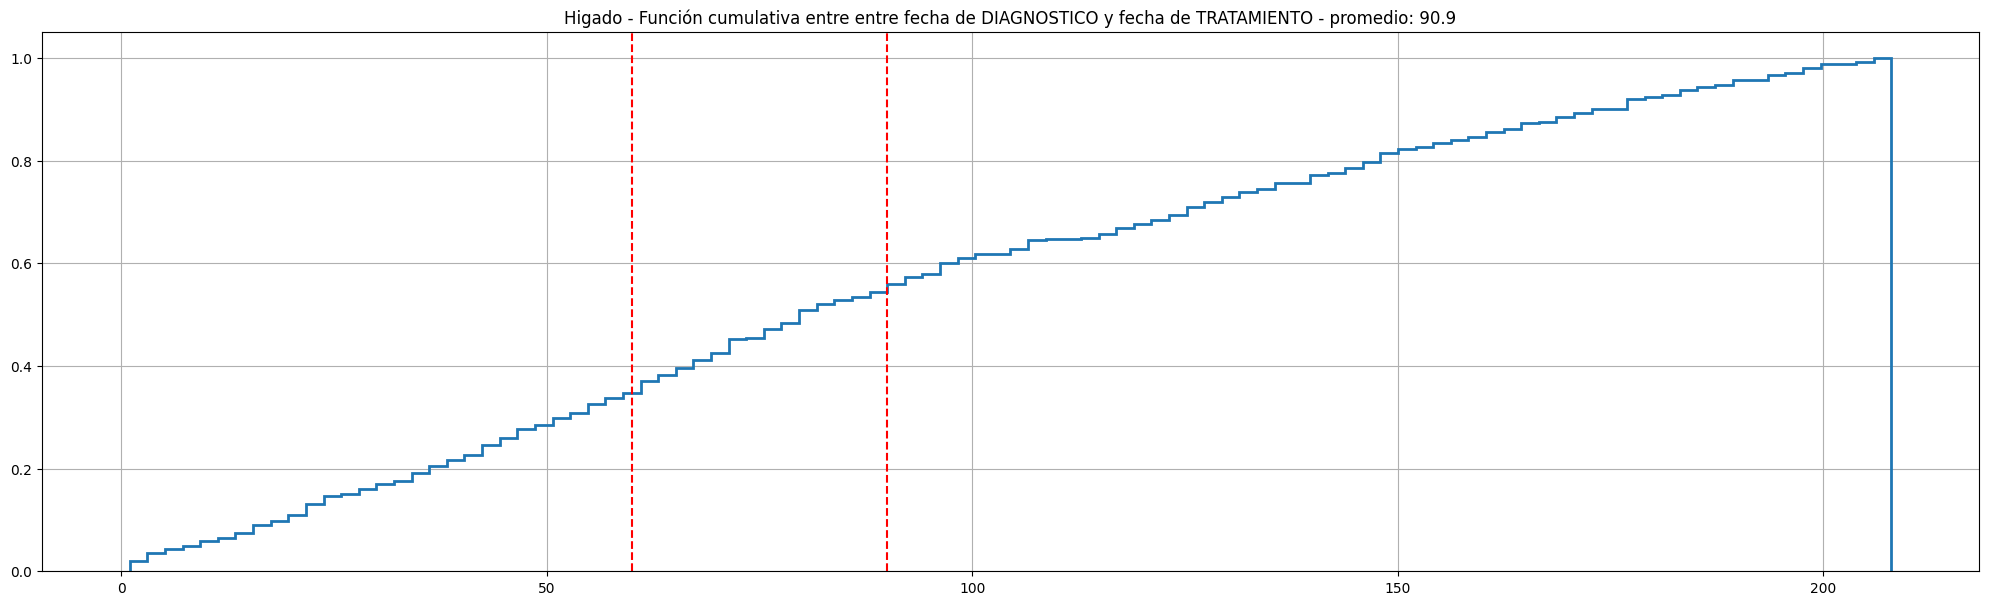

Abriendo sheet: Ganglio
Index(['BIOPSIA ', 'DIAGNOSTICO', 'TRATAMIENTO'], dtype='object', name='Etapa')
{'BIOPSIA ': ['38500'], 'DIAGNOSTICO': ['C810', 'C811', 'C812', 'C813', 'C814', 'C817', 'C819', 'C820', 'C821', 'C822', 'C823', 'C824', 'C825', 'C826', 'C827', 'C829', 'C830', 'C831', 'C832', 'C833', 'C834', 'C835', 'C836', 'C837', 'C838', 'C839', 'C840', 'C841', 'C842', 'C843', 'C844', 'C845', 'C846', 'C847', 'C848', 'C849', 'C851', 'C852', 'C857', 'C859', 'C963'], 'TRATAMIENTO': ['90780', '96410', '96421', '96549', '77305', '77501']}
Etapa: BIOPSIA 
No hay etapa
Etapa: DIAGNOSTICO
Etapa: TRATAMIENTO


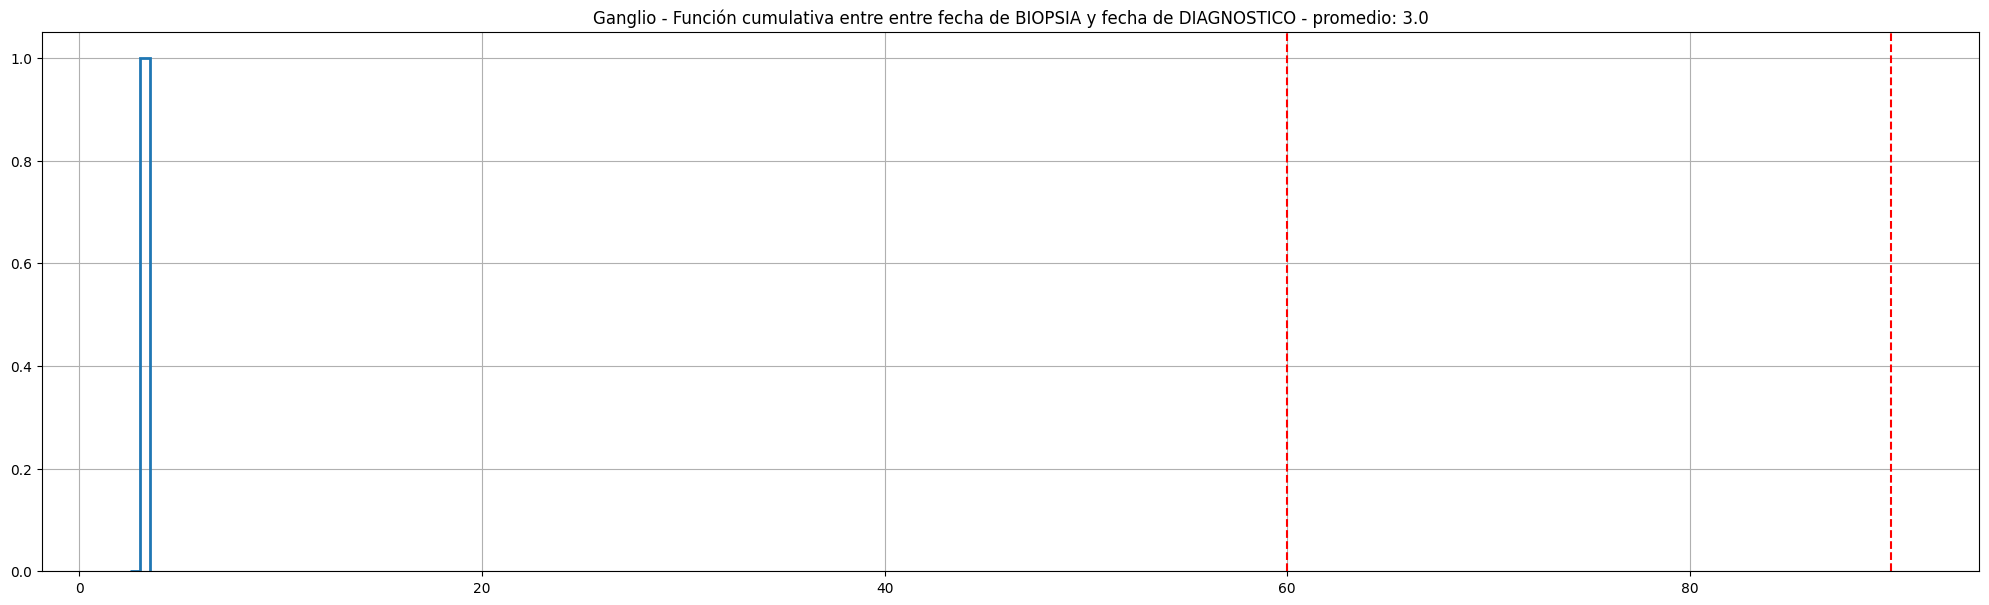

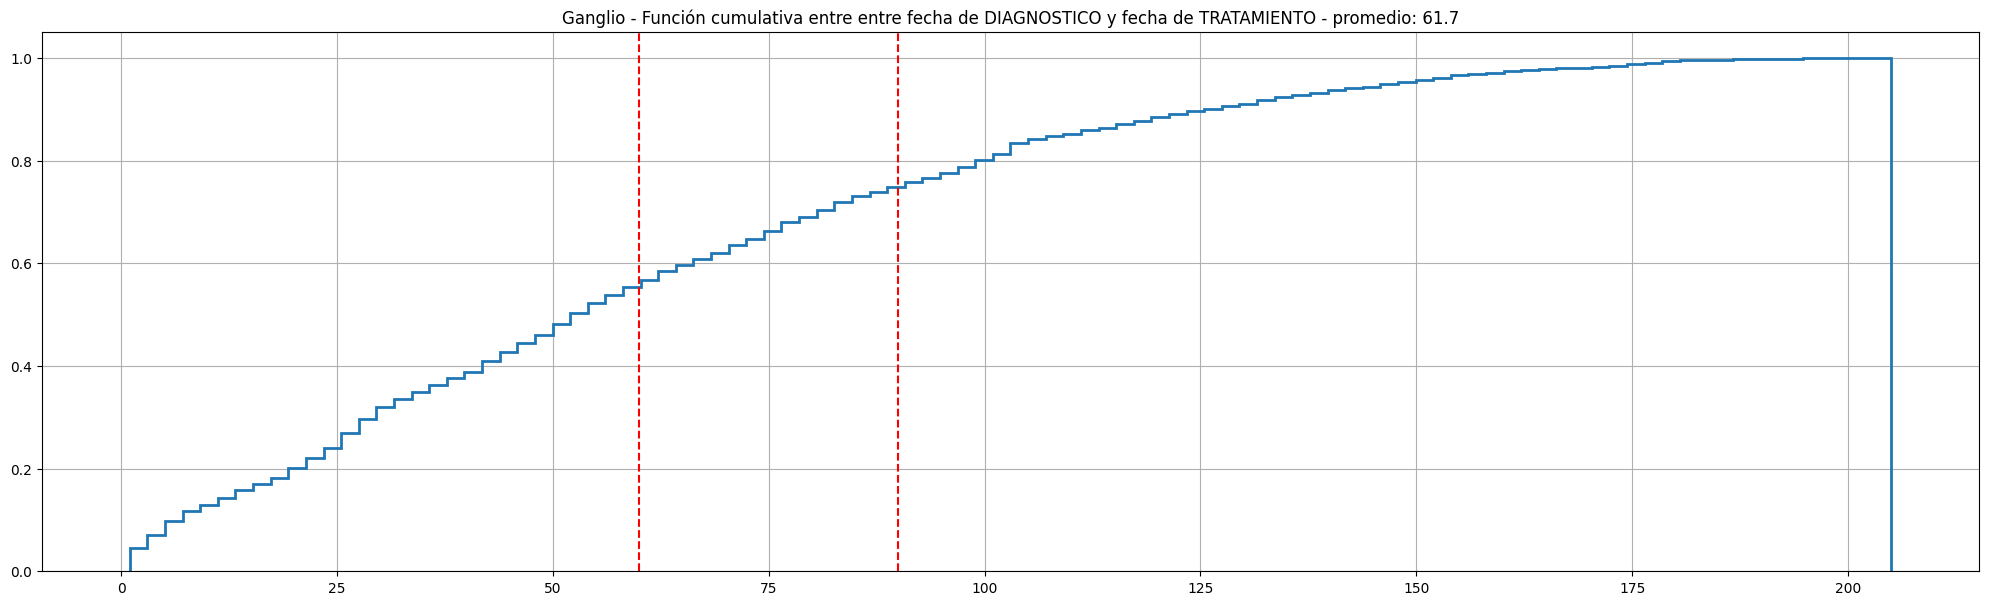

Abriendo sheet: Médula ósea
Index(['BIOPSIA', 'DIAGNOSTICO', 'TRATAMIENTO'], dtype='object', name='Etapa')
{'BIOPSIA': ['85095', '85102'], 'DIAGNOSTICO': ['C901', 'C910', 'C911', 'C912', 'C913', 'C914', 'C915', 'C916', 'C917', 'C918', 'C919', 'C920', 'C921', 'C922', 'C923', 'C924', 'C925', 'C926', 'C927', 'C928', 'C929', 'C930', 'C931', 'C932', 'C933', 'C937', 'C939', 'C940', 'C941', 'C942', 'C943', 'C944', 'C945', 'C946', 'C947', 'C950', 'C951', 'C952', 'C957', 'C959'], 'TRATAMIENTO': ['90780', '96410', '96421', '96549', '77305', '77501']}
Etapa: BIOPSIA
Etapa: DIAGNOSTICO
Etapa: TRATAMIENTO


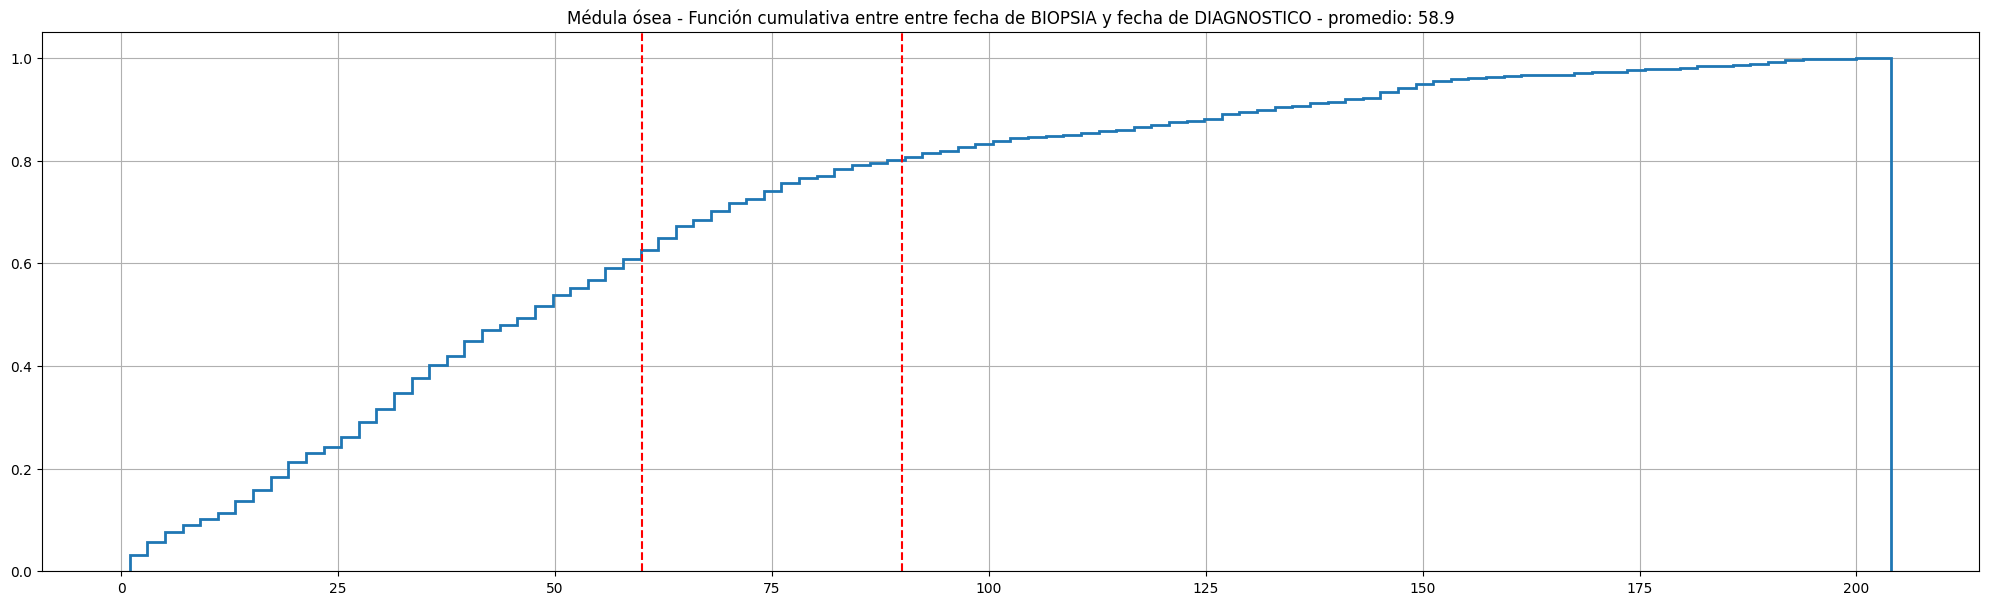

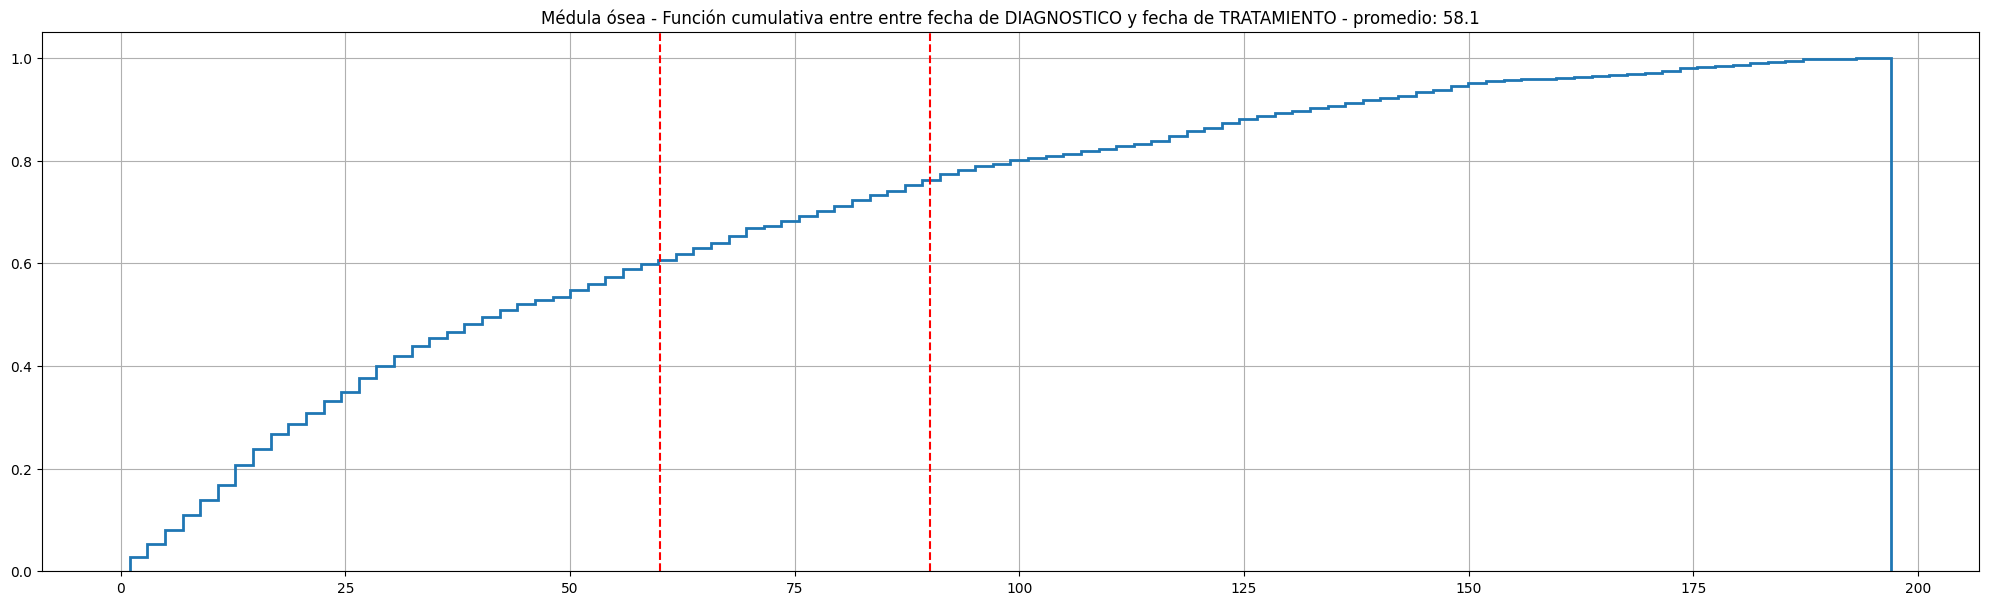

Abriendo sheet: Mama
Index(['TAMIZAJE', 'BIOPSIA', 'DIAGNOSTICO', 'QUIMIOTERAPIA', 'RADIOTERAPIA',
       'BRAQUITERAPIA'],
      dtype='object', name='Etapa')
{'TAMIZAJE': ['77057'], 'BIOPSIA': ['19100', '19101', '19102'], 'DIAGNOSTICO': ['C500', 'C501', 'C502', 'C503', 'C504 ', 'C505', 'C506', 'C508', 'C509'], 'QUIMIOTERAPIA': ['96410', '96421', '96549'], 'RADIOTERAPIA': ['77305'], 'BRAQUITERAPIA': ['77501']}
Etapa: TAMIZAJE
Etapa: BIOPSIA
Etapa: DIAGNOSTICO
Etapa: QUIMIOTERAPIA
Etapa: RADIOTERAPIA
Etapa: BRAQUITERAPIA


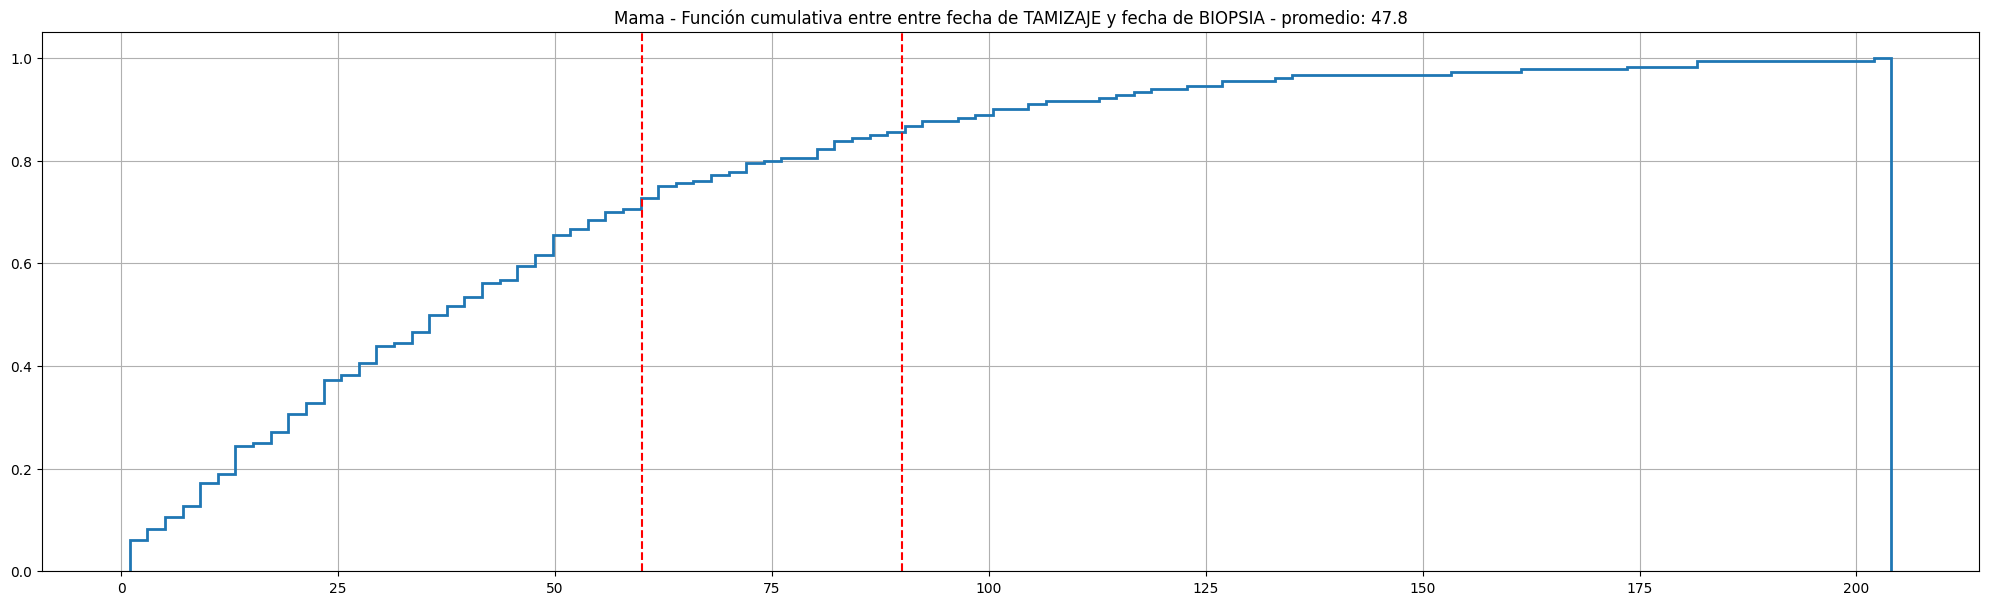

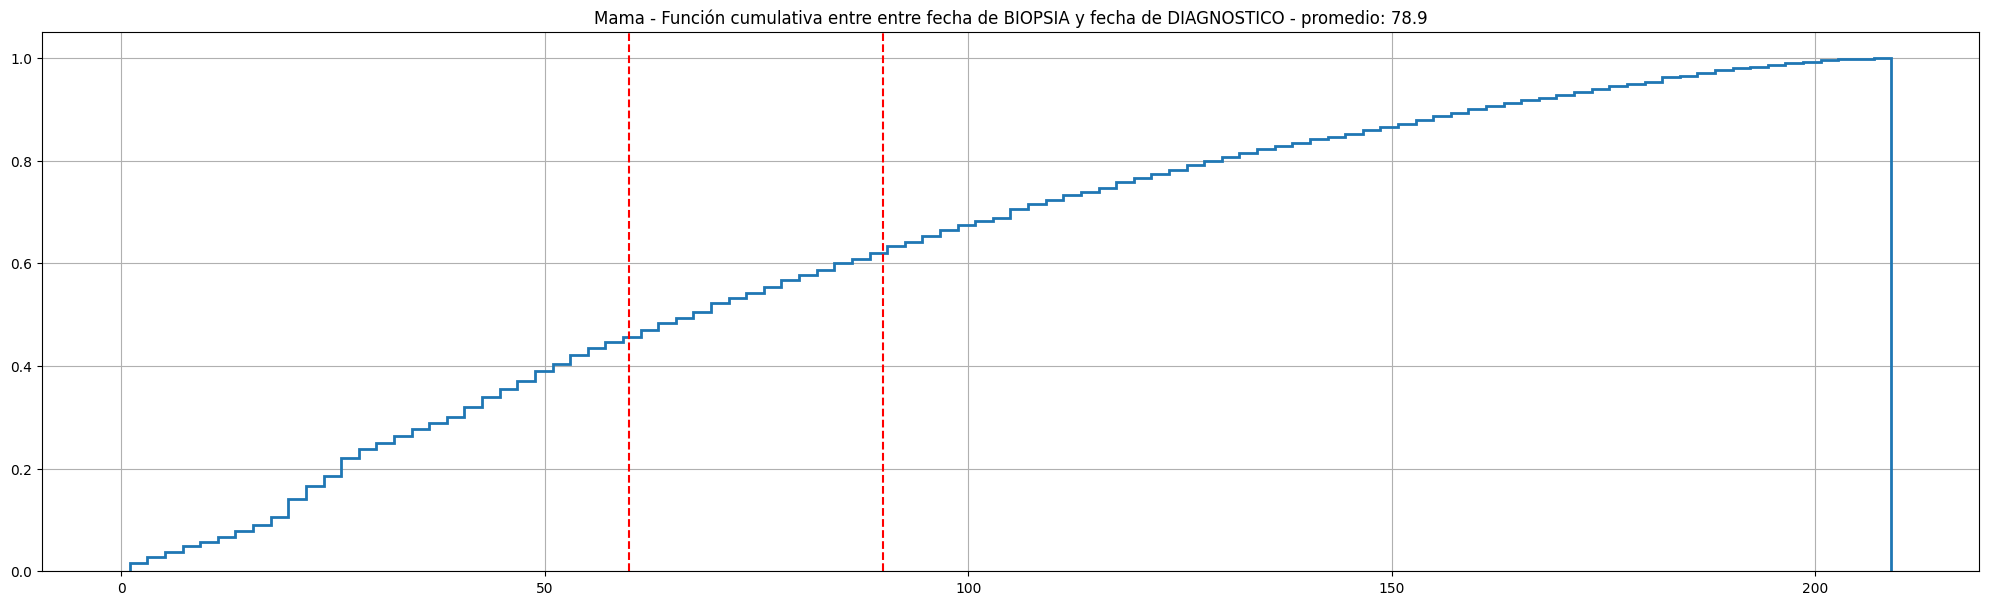

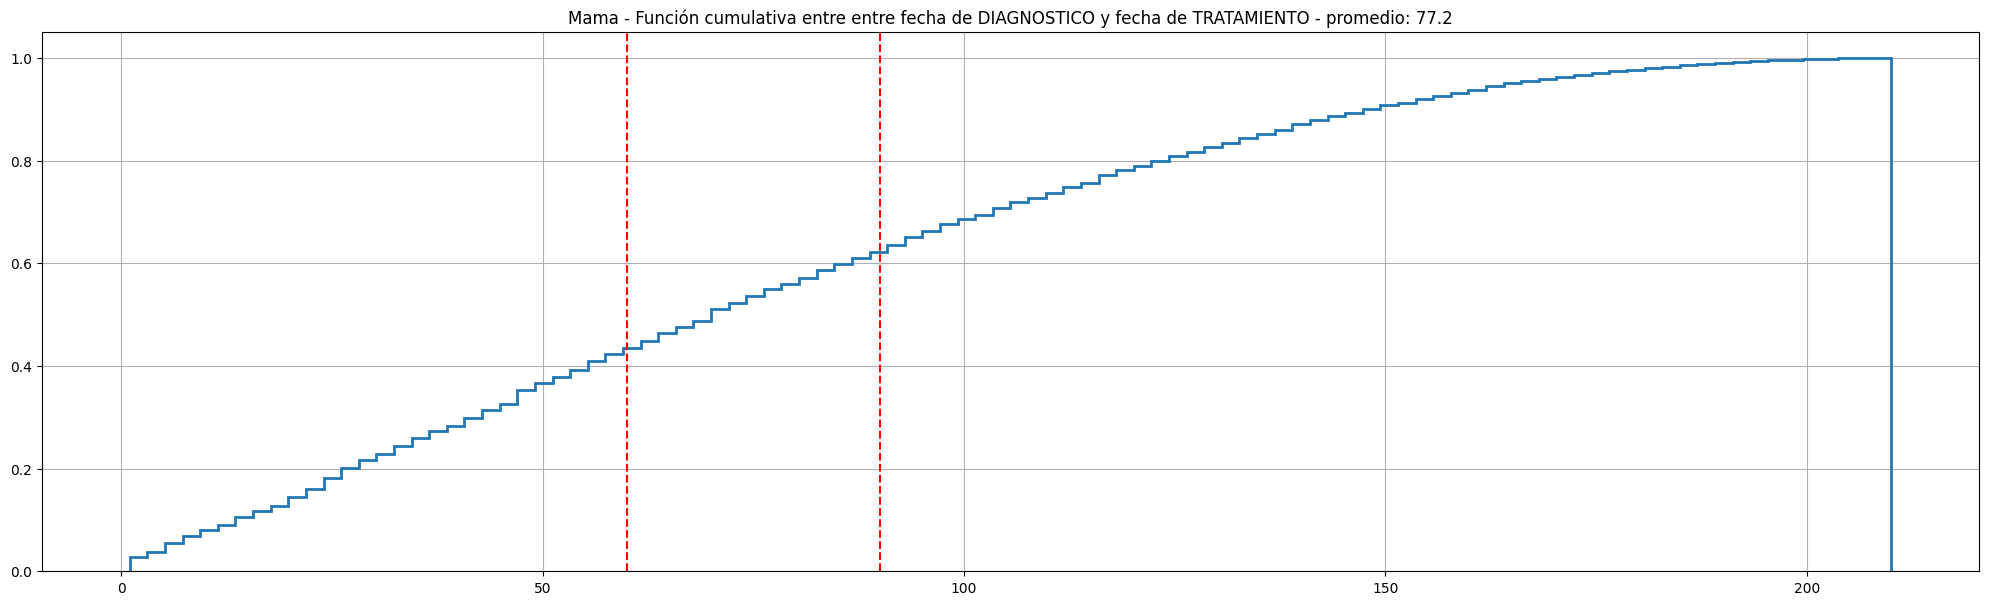

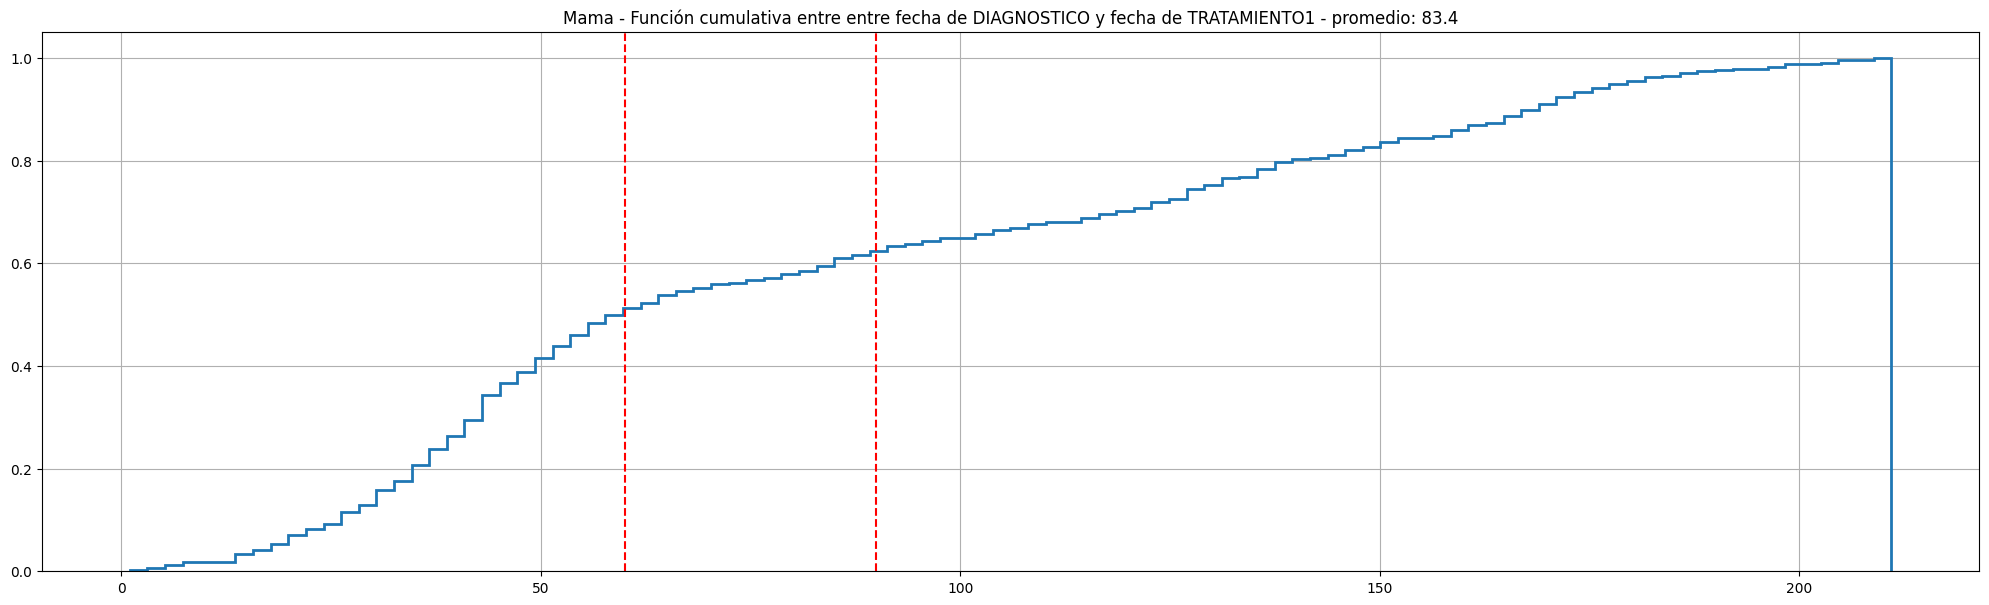

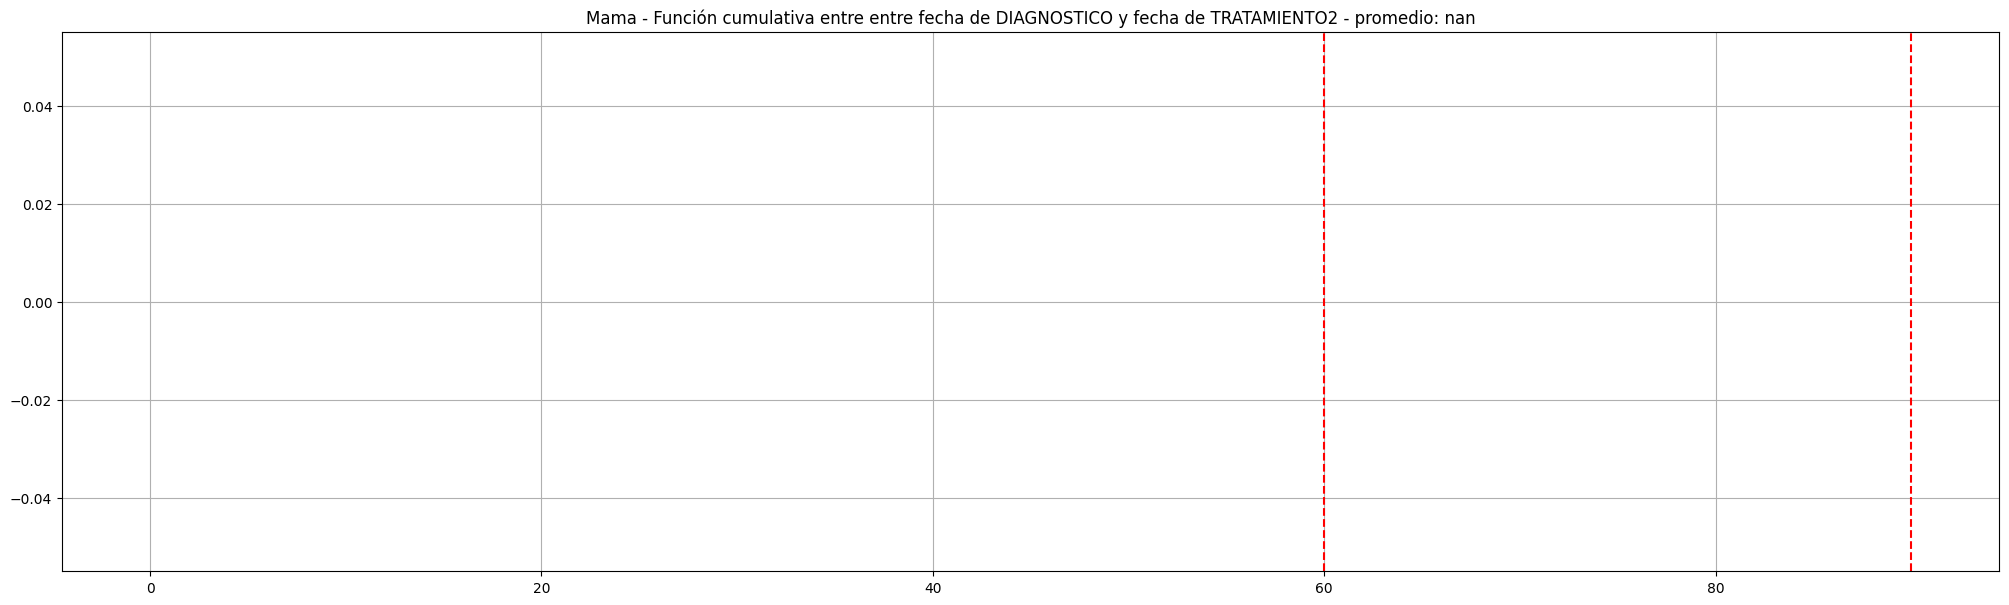

Abriendo sheet: Cérvix
Index(['TAMIZAJE', 'BIOPSIA ', 'DIAGNÓSTICO', 'TRATAMIENTO 1',
       'TRATAMIENTO 2'],
      dtype='object', name='Etapa')
{'TAMIZAJE': ['88141', '88141.01 ', '87621'], 'BIOPSIA ': ['57452', '57500', '58100'], 'DIAGNÓSTICO': ['C530', 'C531', 'C538 ', 'C539', 'N870', 'N871', 'N872 ', 'R876', 'D069'], 'TRATAMIENTO 1': ['96410', '96421', '96549', '77305', '77501'], 'TRATAMIENTO 2': ['57510', '57511', '57522', '57520']}
Etapa: TAMIZAJE
Etapa: BIOPSIA 
No hay etapa
Etapa: DIAGNÓSTICO
No hay etapa
Etapa: TRATAMIENTO 1
Etapa: TRATAMIENTO 2
No hay etapa


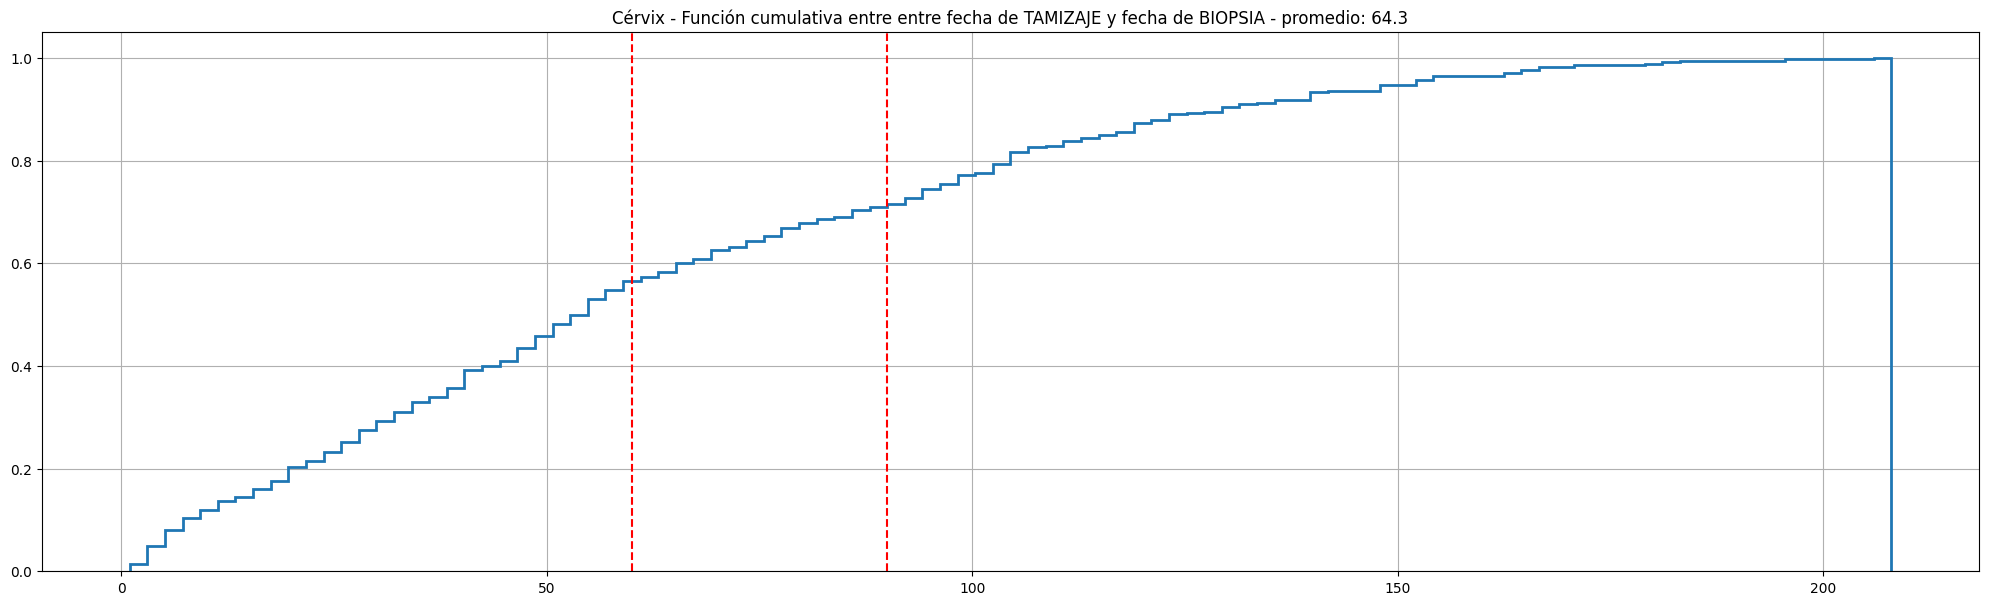

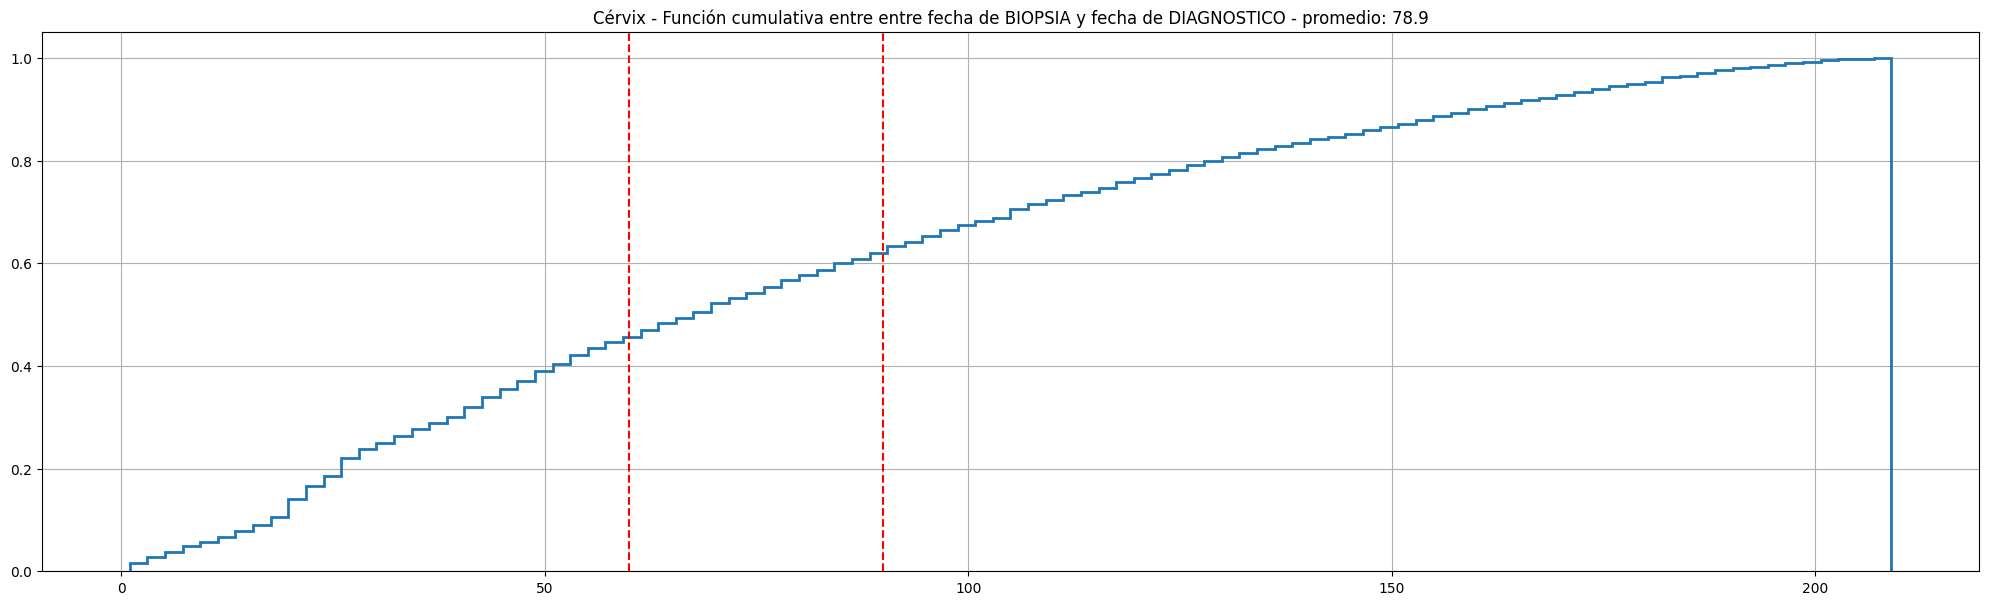

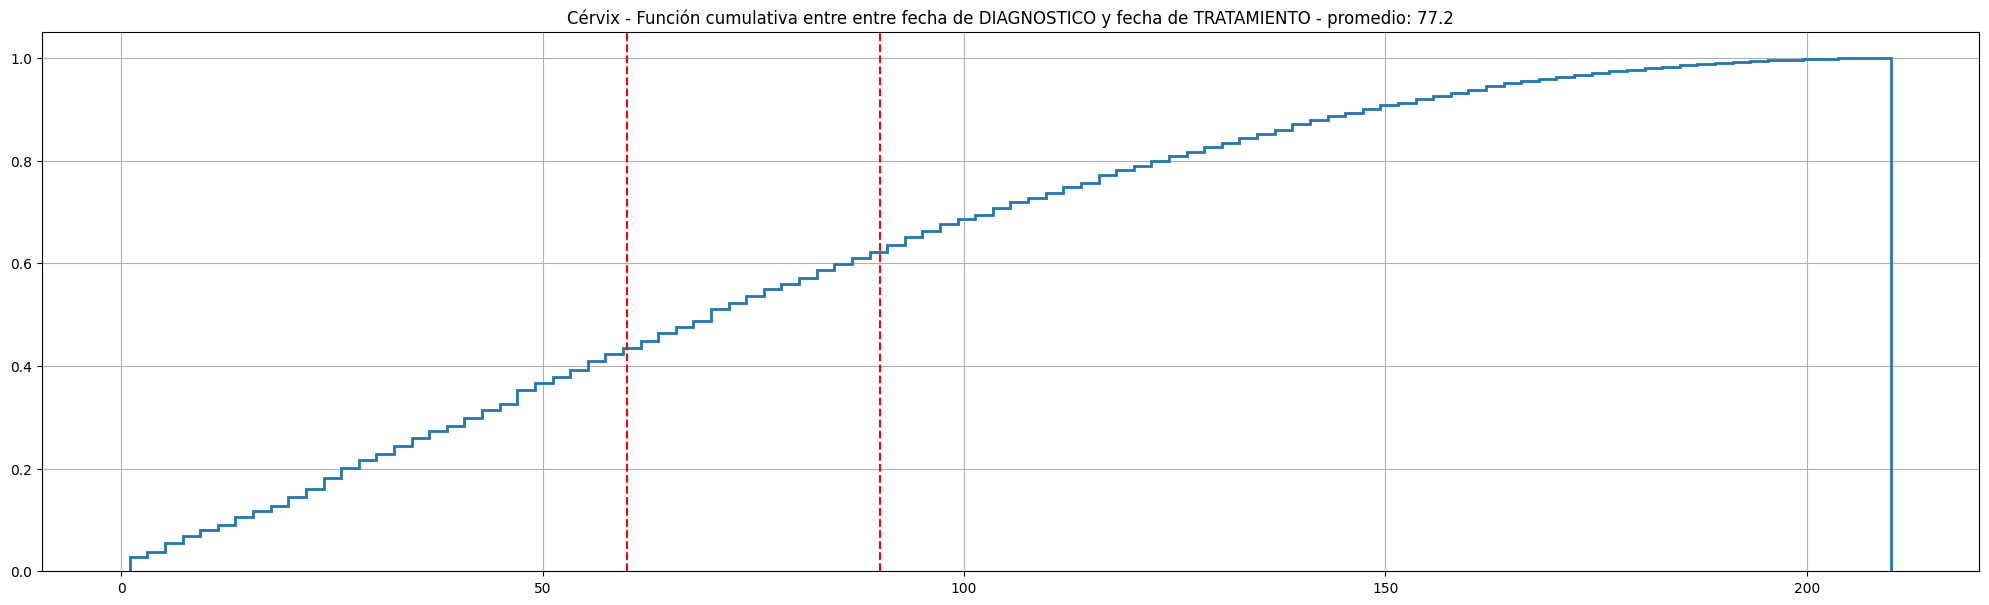

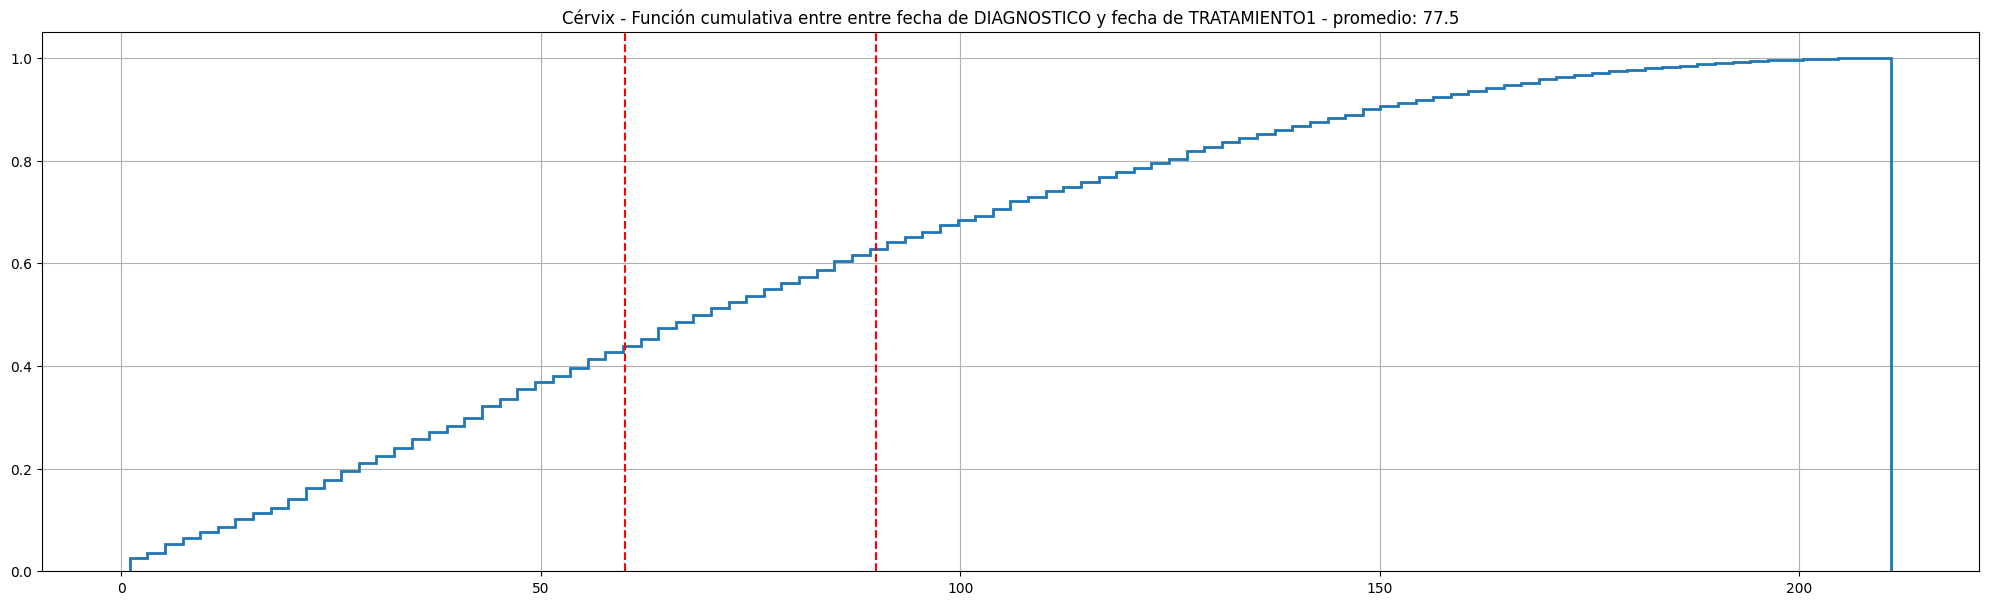

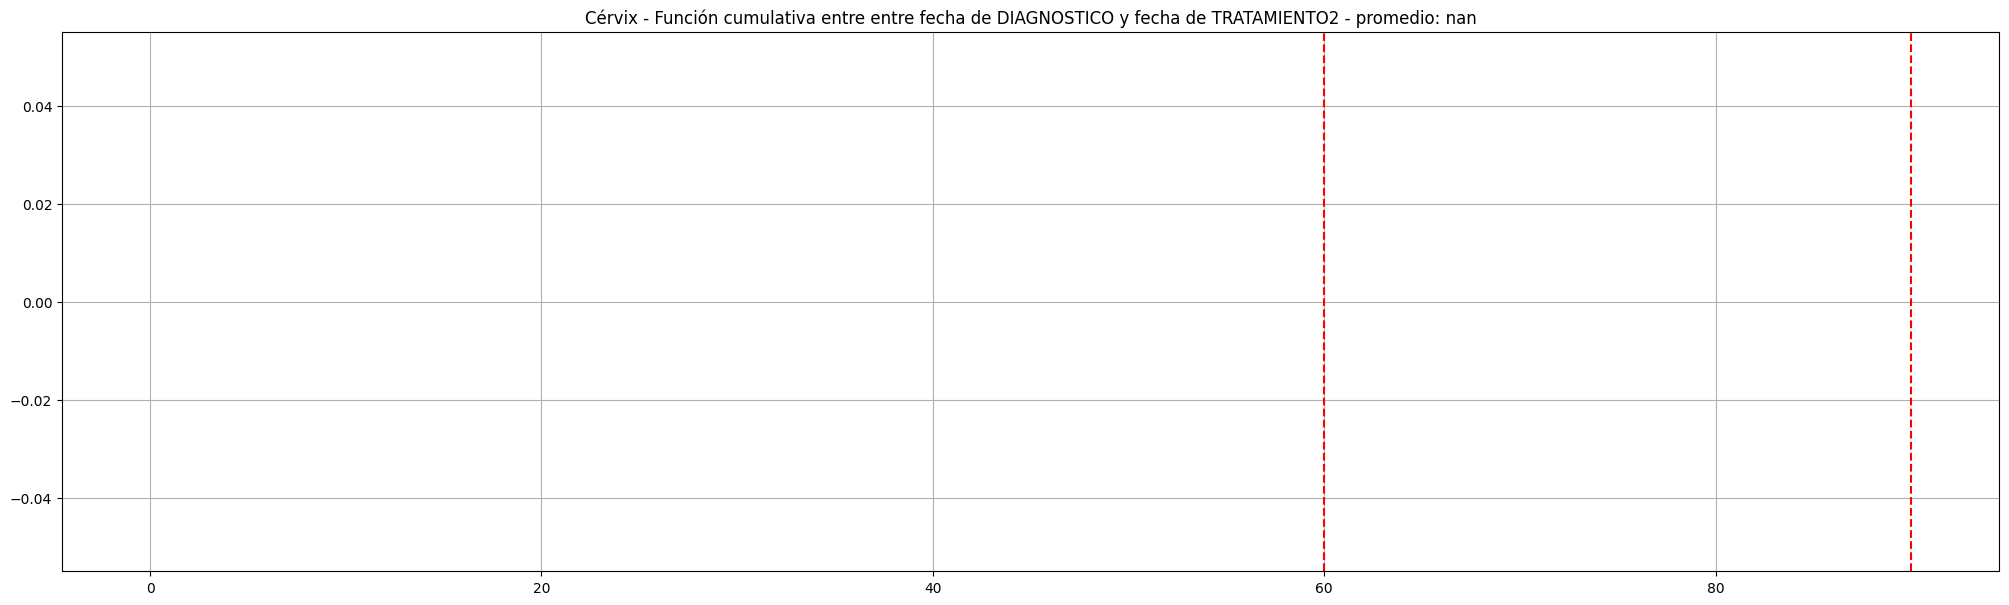

In [109]:
i = 0
for sheet in sheets[1:-4]:
    print("Abriendo sheet:",sheet)
    tabla_cie10 = read_tabla_cancers(sheet)
    #print(tabla_cie10)
    List_tabla_cie10 = tabla_cie10.index.get_level_values(0).unique()
    print(List_tabla_cie10)
    dict_codigos = {}
    for etapa in List_tabla_cie10:
        dict_codigos[etapa] = tabla_cie10.loc[(etapa,slice(None)),].values.flatten().tolist()
    print(dict_codigos)
    dataframes = []
    for etapa in List_tabla_cie10:
        print("Etapa:", etapa)
        if etapa == "TAMIZAJE":
            df_CANCER_TAMIZAJE_SAMPLE = df_CANCER_TAMIZAJE[df_CANCER_TAMIZAJE["Diagnostico"].isin(dict_codigos[etapa])]
            dataframes.append(df_CANCER_TAMIZAJE_SAMPLE)
            #print(df_CANCER_TAMIZAJE_SAMPLE)
        elif etapa == "BIOPSIA":
            df_CANCER_PROCEDIMIENTOS_SAMPLE = df_CANCER_PROCEDIMIENTOS[df_CANCER_PROCEDIMIENTOS["Diagnostico"].isin(dict_codigos[etapa])]
            dataframes.append(df_CANCER_PROCEDIMIENTOS_SAMPLE)
            #print(df_CANCER_PROCEDIMIENTOS_SAMPLE)
        elif etapa == "DIAGNOSTICO":
            df_CANCER_ATENDIDOS_SAMPLE = df_CANCER_ATENDIDOS[df_CANCER_ATENDIDOS["Diagnostico"].isin(dict_codigos[etapa])]
            dataframes.append(df_CANCER_ATENDIDOS_SAMPLE)
            #print(df_CANCER_ATENDIDOS_SAMPLE)
        elif (etapa == "TRATAMIENTO")| (etapa == "QUIMIOTERAPIA"):
            df_CANCER_TRATAMIENTOS_SAMPLE = df_CANCER_TRATAMIENTOS[df_CANCER_TRATAMIENTOS["Diagnostico"].isin(dict_codigos[etapa])]
            dataframes.append(df_CANCER_TRATAMIENTOS_SAMPLE)
            #print(df_CANCER_TRATAMIENTOS_SAMPLE)
        elif (etapa == "TRATAMIENTO 1")| (etapa == "RADIOTERAPIA"):
            df_CANCER_TRATAMIENTOS_SAMPLE_1 = df_CANCER_TRATAMIENTOS[df_CANCER_TRATAMIENTOS["Diagnostico"].isin(dict_codigos[etapa])]
            dataframes.append(df_CANCER_TRATAMIENTOS_SAMPLE_1)
            #print(df_CANCER_TRATAMIENTOS_SAMPLE_1)
        elif (etapa == "TRATAMIENTO 3")| (etapa == "BRAQUITERAPIA"):
            df_CANCER_TRATAMIENTOS_SAMPLE_2 = df_CANCER_TRATAMIENTOS[df_CANCER_TRATAMIENTOS["Diagnostico"].isin(dict_codigos[etapa])]
            dataframes.append(df_CANCER_TRATAMIENTOS_SAMPLE_2)
        else:
            print("No hay etapa")
    if i == 0:
        df_CANCER_TAM_BIO = df_CANCER_TAMIZAJE_SAMPLE.merge(df_CANCER_PROCEDIMIENTOS_SAMPLE[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_TAM","_BIO")).dropna()
        # create a new column calculating the difference between the two dates in months
        df_CANCER_TAM_BIO["Diferencia"] = (df_CANCER_TAM_BIO["Fecha_atencion_BIO"] - df_CANCER_TAM_BIO["Fecha_atencion_TAM"]).dt.days
        cdf_plot(df_CANCER_TAM_BIO, "TAMIZAJE", "BIOPSIA", "_TAM", sheet)

        df_CANCER_BIO_DIAG = df_CANCER_PROCEDIMIENTOS_SAMPLE.merge(df_CANCER_ATENDIDOS_SAMPLE[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_BIO","_DIAG")).dropna()
        # create a new column calculating the difference between the two dates in months
        df_CANCER_BIO_DIAG["Diferencia"] = (df_CANCER_BIO_DIAG["Fecha_atencion_DIAG"] - df_CANCER_BIO_DIAG["Fecha_atencion_BIO"]).dt.days
        cdf_plot(df_CANCER_BIO_DIAG, "BIOPSIA", "DIAGNOSTICO", "_BIO", sheet)

        df_CANCER_DIAG_TRAT = df_CANCER_ATENDIDOS_SAMPLE.merge(df_CANCER_TRATAMIENTOS_SAMPLE[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_DIAG","_TRAT")).dropna()
        # create a new column calculating the difference between the two dates in months
        df_CANCER_DIAG_TRAT["Diferencia"] = (df_CANCER_DIAG_TRAT["Fecha_atencion_TRAT"] - df_CANCER_DIAG_TRAT["Fecha_atencion_DIAG"]).dt.days
        cdf_plot(df_CANCER_DIAG_TRAT, "DIAGNOSTICO", "TRATAMIENTO", "_DIAG", sheet)

    elif i == 1:
        df_CANCER_TAM_BIO = df_CANCER_TAMIZAJE_SAMPLE.merge(df_CANCER_PROCEDIMIENTOS_SAMPLE[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_TAM","_BIO")).dropna()
        # create a new column calculating the difference between the two dates in months
        df_CANCER_TAM_BIO["Diferencia"] = (df_CANCER_TAM_BIO["Fecha_atencion_BIO"] - df_CANCER_TAM_BIO["Fecha_atencion_TAM"]).dt.days
        cdf_plot(df_CANCER_TAM_BIO, "TAMIZAJE", "BIOPSIA", "_TAM", sheet)

        df_CANCER_BIO_DIAG = df_CANCER_PROCEDIMIENTOS_SAMPLE.merge(df_CANCER_ATENDIDOS_SAMPLE[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_BIO","_DIAG")).dropna()
        # create a new column calculating the difference between the two dates in months
        df_CANCER_BIO_DIAG["Diferencia"] = (df_CANCER_BIO_DIAG["Fecha_atencion_DIAG"] - df_CANCER_BIO_DIAG["Fecha_atencion_BIO"]).dt.days
        cdf_plot(df_CANCER_BIO_DIAG, "BIOPSIA", "DIAGNOSTICO", "_BIO", sheet)

        df_CANCER_DIAG_TRAT = df_CANCER_ATENDIDOS_SAMPLE.merge(df_CANCER_TRATAMIENTOS_SAMPLE[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_DIAG","_TRAT")).dropna()
        # create a new column calculating the difference between the two dates in months
        df_CANCER_DIAG_TRAT["Diferencia"] = (df_CANCER_DIAG_TRAT["Fecha_atencion_TRAT"] - df_CANCER_DIAG_TRAT["Fecha_atencion_DIAG"]).dt.days
        cdf_plot(df_CANCER_DIAG_TRAT, "DIAGNOSTICO", "TRATAMIENTO", "_DIAG", sheet)
    elif i == 2:
        df_CANCER_TAM_BIO = df_CANCER_TAMIZAJE_SAMPLE.merge(df_CANCER_PROCEDIMIENTOS_SAMPLE[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_TAM","_BIO")).dropna()
        # create a new column calculating the difference between the two dates in months
        df_CANCER_TAM_BIO["Diferencia"] = (df_CANCER_TAM_BIO["Fecha_atencion_BIO"] - df_CANCER_TAM_BIO["Fecha_atencion_TAM"]).dt.days
        cdf_plot(df_CANCER_TAM_BIO, "TAMIZAJE", "BIOPSIA", "_TAM", sheet)

        df_CANCER_BIO_DIAG = df_CANCER_PROCEDIMIENTOS_SAMPLE.merge(df_CANCER_ATENDIDOS_SAMPLE[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_BIO","_DIAG")).dropna()
        # create a new column calculating the difference between the two dates in months
        df_CANCER_BIO_DIAG["Diferencia"] = (df_CANCER_BIO_DIAG["Fecha_atencion_DIAG"] - df_CANCER_BIO_DIAG["Fecha_atencion_BIO"]).dt.days
        cdf_plot(df_CANCER_BIO_DIAG, "BIOPSIA", "DIAGNOSTICO", "_BIO", sheet)

        df_CANCER_DIAG_TRAT = df_CANCER_ATENDIDOS_SAMPLE.merge(df_CANCER_TRATAMIENTOS_SAMPLE[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_DIAG","_TRAT")).dropna()
        # create a new column calculating the difference between the two dates in months
        df_CANCER_DIAG_TRAT["Diferencia"] = (df_CANCER_DIAG_TRAT["Fecha_atencion_TRAT"] - df_CANCER_DIAG_TRAT["Fecha_atencion_DIAG"]).dt.days
        cdf_plot(df_CANCER_DIAG_TRAT, "DIAGNOSTICO", "TRATAMIENTO", "_DIAG", sheet)

    elif i == 3:

        df_CANCER_BIO_DIAG = df_CANCER_PROCEDIMIENTOS_SAMPLE.merge(df_CANCER_ATENDIDOS_SAMPLE[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_BIO","_DIAG")).dropna()
        # create a new column calculating the difference between the two dates in months
        df_CANCER_BIO_DIAG["Diferencia"] = (df_CANCER_BIO_DIAG["Fecha_atencion_DIAG"] - df_CANCER_BIO_DIAG["Fecha_atencion_BIO"]).dt.days
        cdf_plot(df_CANCER_BIO_DIAG, "BIOPSIA", "DIAGNOSTICO", "_BIO", sheet)

        df_CANCER_DIAG_TRAT = df_CANCER_ATENDIDOS_SAMPLE.merge(df_CANCER_TRATAMIENTOS_SAMPLE[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_DIAG","_TRAT")).dropna()
        # create a new column calculating the difference between the two dates in months
        df_CANCER_DIAG_TRAT["Diferencia"] = (df_CANCER_DIAG_TRAT["Fecha_atencion_TRAT"] - df_CANCER_DIAG_TRAT["Fecha_atencion_DIAG"]).dt.days
        cdf_plot(df_CANCER_DIAG_TRAT, "DIAGNOSTICO", "TRATAMIENTO", "_DIAG", sheet)

    elif i == 4:

        df_CANCER_BIO_DIAG = df_CANCER_PROCEDIMIENTOS_SAMPLE.merge(df_CANCER_ATENDIDOS_SAMPLE[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_BIO","_DIAG")).dropna()
        # create a new column calculating the difference between the two dates in months
        df_CANCER_BIO_DIAG["Diferencia"] = (df_CANCER_BIO_DIAG["Fecha_atencion_DIAG"] - df_CANCER_BIO_DIAG["Fecha_atencion_BIO"]).dt.days
        cdf_plot(df_CANCER_BIO_DIAG, "BIOPSIA", "DIAGNOSTICO", "_BIO", sheet)

        df_CANCER_DIAG_TRAT = df_CANCER_ATENDIDOS_SAMPLE.merge(df_CANCER_TRATAMIENTOS_SAMPLE[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_DIAG","_TRAT")).dropna()
        # create a new column calculating the difference between the two dates in months
        df_CANCER_DIAG_TRAT["Diferencia"] = (df_CANCER_DIAG_TRAT["Fecha_atencion_TRAT"] - df_CANCER_DIAG_TRAT["Fecha_atencion_DIAG"]).dt.days
        cdf_plot(df_CANCER_DIAG_TRAT, "DIAGNOSTICO", "TRATAMIENTO", "_DIAG", sheet)

    elif i == 5:

        df_CANCER_BIO_DIAG = df_CANCER_PROCEDIMIENTOS_SAMPLE.merge(df_CANCER_ATENDIDOS_SAMPLE[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_BIO","_DIAG")).dropna()
        # create a new column calculating the difference between the two dates in months
        df_CANCER_BIO_DIAG["Diferencia"] = (df_CANCER_BIO_DIAG["Fecha_atencion_DIAG"] - df_CANCER_BIO_DIAG["Fecha_atencion_BIO"]).dt.days
        cdf_plot(df_CANCER_BIO_DIAG, "BIOPSIA", "DIAGNOSTICO", "_BIO", sheet)

        df_CANCER_DIAG_TRAT = df_CANCER_ATENDIDOS_SAMPLE.merge(df_CANCER_TRATAMIENTOS_SAMPLE[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_DIAG","_TRAT")).dropna()
        # create a new column calculating the difference between the two dates in months
        df_CANCER_DIAG_TRAT["Diferencia"] = (df_CANCER_DIAG_TRAT["Fecha_atencion_TRAT"] - df_CANCER_DIAG_TRAT["Fecha_atencion_DIAG"]).dt.days
        cdf_plot(df_CANCER_DIAG_TRAT, "DIAGNOSTICO", "TRATAMIENTO", "_DIAG", sheet)

    elif i == 6:

        df_CANCER_BIO_DIAG = df_CANCER_PROCEDIMIENTOS_SAMPLE.merge(df_CANCER_ATENDIDOS_SAMPLE[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_BIO","_DIAG")).dropna()
        # create a new column calculating the difference between the two dates in months
        df_CANCER_BIO_DIAG["Diferencia"] = (df_CANCER_BIO_DIAG["Fecha_atencion_DIAG"] - df_CANCER_BIO_DIAG["Fecha_atencion_BIO"]).dt.days
        cdf_plot(df_CANCER_BIO_DIAG, "BIOPSIA", "DIAGNOSTICO", "_BIO", sheet)

        df_CANCER_DIAG_TRAT = df_CANCER_ATENDIDOS_SAMPLE.merge(df_CANCER_TRATAMIENTOS_SAMPLE[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_DIAG","_TRAT")).dropna()
        # create a new column calculating the difference between the two dates in months
        df_CANCER_DIAG_TRAT["Diferencia"] = (df_CANCER_DIAG_TRAT["Fecha_atencion_TRAT"] - df_CANCER_DIAG_TRAT["Fecha_atencion_DIAG"]).dt.days
        cdf_plot(df_CANCER_DIAG_TRAT, "DIAGNOSTICO", "TRATAMIENTO", "_DIAG", sheet)

    elif i == 7:
        df_CANCER_TAM_BIO = df_CANCER_TAMIZAJE_SAMPLE.merge(df_CANCER_PROCEDIMIENTOS_SAMPLE[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_TAM","_BIO")).dropna()
        # create a new column calculating the difference between the two dates in months
        df_CANCER_TAM_BIO["Diferencia"] = (df_CANCER_TAM_BIO["Fecha_atencion_BIO"] - df_CANCER_TAM_BIO["Fecha_atencion_TAM"]).dt.days
        cdf_plot(df_CANCER_TAM_BIO, "TAMIZAJE", "BIOPSIA", "_TAM", sheet)

        df_CANCER_BIO_DIAG = df_CANCER_PROCEDIMIENTOS_SAMPLE.merge(df_CANCER_ATENDIDOS_SAMPLE[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_BIO","_DIAG")).dropna()
        # create a new column calculating the difference between the two dates in months
        df_CANCER_BIO_DIAG["Diferencia"] = (df_CANCER_BIO_DIAG["Fecha_atencion_DIAG"] - df_CANCER_BIO_DIAG["Fecha_atencion_BIO"]).dt.days
        cdf_plot(df_CANCER_BIO_DIAG, "BIOPSIA", "DIAGNOSTICO", "_BIO", sheet)

        df_CANCER_DIAG_TRAT = df_CANCER_ATENDIDOS_SAMPLE.merge(df_CANCER_TRATAMIENTOS_SAMPLE[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_DIAG","_TRAT")).dropna()
        # create a new column calculating the difference between the two dates in months
        df_CANCER_DIAG_TRAT["Diferencia"] = (df_CANCER_DIAG_TRAT["Fecha_atencion_TRAT"] - df_CANCER_DIAG_TRAT["Fecha_atencion_DIAG"]).dt.days
        cdf_plot(df_CANCER_DIAG_TRAT, "DIAGNOSTICO", "TRATAMIENTO", "_DIAG", sheet)

        df_CANCER_DIAG_TRAT1 = df_CANCER_ATENDIDOS_SAMPLE.merge(df_CANCER_TRATAMIENTOS_SAMPLE_1[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_DIAG","_TRAT1")).dropna()
        # create a new column calculating the difference between the two dates in months
        df_CANCER_DIAG_TRAT1["Diferencia"] = (df_CANCER_DIAG_TRAT1["Fecha_atencion_TRAT1"] - df_CANCER_DIAG_TRAT1["Fecha_atencion_DIAG"]).dt.days
        cdf_plot(df_CANCER_DIAG_TRAT1, "DIAGNOSTICO", "TRATAMIENTO1", "_DIAG", sheet)

        df_CANCER_DIAG_TRAT2 = df_CANCER_ATENDIDOS_SAMPLE.merge(df_CANCER_TRATAMIENTOS_SAMPLE_2[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_DIAG","_TRAT2")).dropna()
        # create a new column calculating the difference between the two dates in months
        df_CANCER_DIAG_TRAT2["Diferencia"] = (df_CANCER_DIAG_TRAT2["Fecha_atencion_TRAT2"] - df_CANCER_DIAG_TRAT2["Fecha_atencion_DIAG"]).dt.days
        cdf_plot(df_CANCER_DIAG_TRAT2, "DIAGNOSTICO", "TRATAMIENTO2", "_DIAG", sheet)
    elif i == 8:
        df_CANCER_TAM_BIO = df_CANCER_TAMIZAJE_SAMPLE.merge(df_CANCER_PROCEDIMIENTOS_SAMPLE[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_TAM","_BIO")).dropna()
        # create a new column calculating the difference between the two dates in months
        df_CANCER_TAM_BIO["Diferencia"] = (df_CANCER_TAM_BIO["Fecha_atencion_BIO"] - df_CANCER_TAM_BIO["Fecha_atencion_TAM"]).dt.days
        cdf_plot(df_CANCER_TAM_BIO, "TAMIZAJE", "BIOPSIA", "_TAM", sheet)

        df_CANCER_BIO_DIAG = df_CANCER_PROCEDIMIENTOS_SAMPLE.merge(df_CANCER_ATENDIDOS_SAMPLE[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_BIO","_DIAG")).dropna()
        # create a new column calculating the difference between the two dates in months
        df_CANCER_BIO_DIAG["Diferencia"] = (df_CANCER_BIO_DIAG["Fecha_atencion_DIAG"] - df_CANCER_BIO_DIAG["Fecha_atencion_BIO"]).dt.days
        cdf_plot(df_CANCER_BIO_DIAG, "BIOPSIA", "DIAGNOSTICO", "_BIO", sheet)

        df_CANCER_DIAG_TRAT = df_CANCER_ATENDIDOS_SAMPLE.merge(df_CANCER_TRATAMIENTOS_SAMPLE[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_DIAG","_TRAT")).dropna()
        # create a new column calculating the difference between the two dates in months
        df_CANCER_DIAG_TRAT["Diferencia"] = (df_CANCER_DIAG_TRAT["Fecha_atencion_TRAT"] - df_CANCER_DIAG_TRAT["Fecha_atencion_DIAG"]).dt.days
        cdf_plot(df_CANCER_DIAG_TRAT, "DIAGNOSTICO", "TRATAMIENTO", "_DIAG", sheet)

        df_CANCER_DIAG_TRAT1 = df_CANCER_ATENDIDOS_SAMPLE.merge(df_CANCER_TRATAMIENTOS_SAMPLE_1[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_DIAG","_TRAT1")).dropna()
        # create a new column calculating the difference between the two dates in months
        df_CANCER_DIAG_TRAT1["Diferencia"] = (df_CANCER_DIAG_TRAT1["Fecha_atencion_TRAT1"] - df_CANCER_DIAG_TRAT1["Fecha_atencion_DIAG"]).dt.days
        cdf_plot(df_CANCER_DIAG_TRAT1, "DIAGNOSTICO", "TRATAMIENTO1", "_DIAG", sheet)

        df_CANCER_DIAG_TRAT2 = df_CANCER_ATENDIDOS_SAMPLE.merge(df_CANCER_TRATAMIENTOS_SAMPLE_2[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_DIAG","_TRAT2")).dropna()
        # create a new column calculating the difference between the two dates in months
        df_CANCER_DIAG_TRAT2["Diferencia"] = (df_CANCER_DIAG_TRAT2["Fecha_atencion_TRAT2"] - df_CANCER_DIAG_TRAT2["Fecha_atencion_DIAG"]).dt.days
        cdf_plot(df_CANCER_DIAG_TRAT2, "DIAGNOSTICO", "TRATAMIENTO2", "_DIAG", sheet)
    i = i + 1

Abriendo sheet: Colon y recto
Index(['TAMIZAJE', 'BIOPSIA', 'DIAGNOSTICO', 'TRATAMIENTO'], dtype='object', name='Etapa')
{'TAMIZAJE': ['82270'], 'BIOPSIA': ['44389'], 'DIAGNOSTICO': ['C19X', 'C20', 'C180', 'C181', 'C182', 'C183', 'C184', 'C185', 'C186', 'C187', 'C188', 'C189'], 'TRATAMIENTO': ['90780', '96410', '96421', '96549', '77305', '77501']}
Etapa: TAMIZAJE


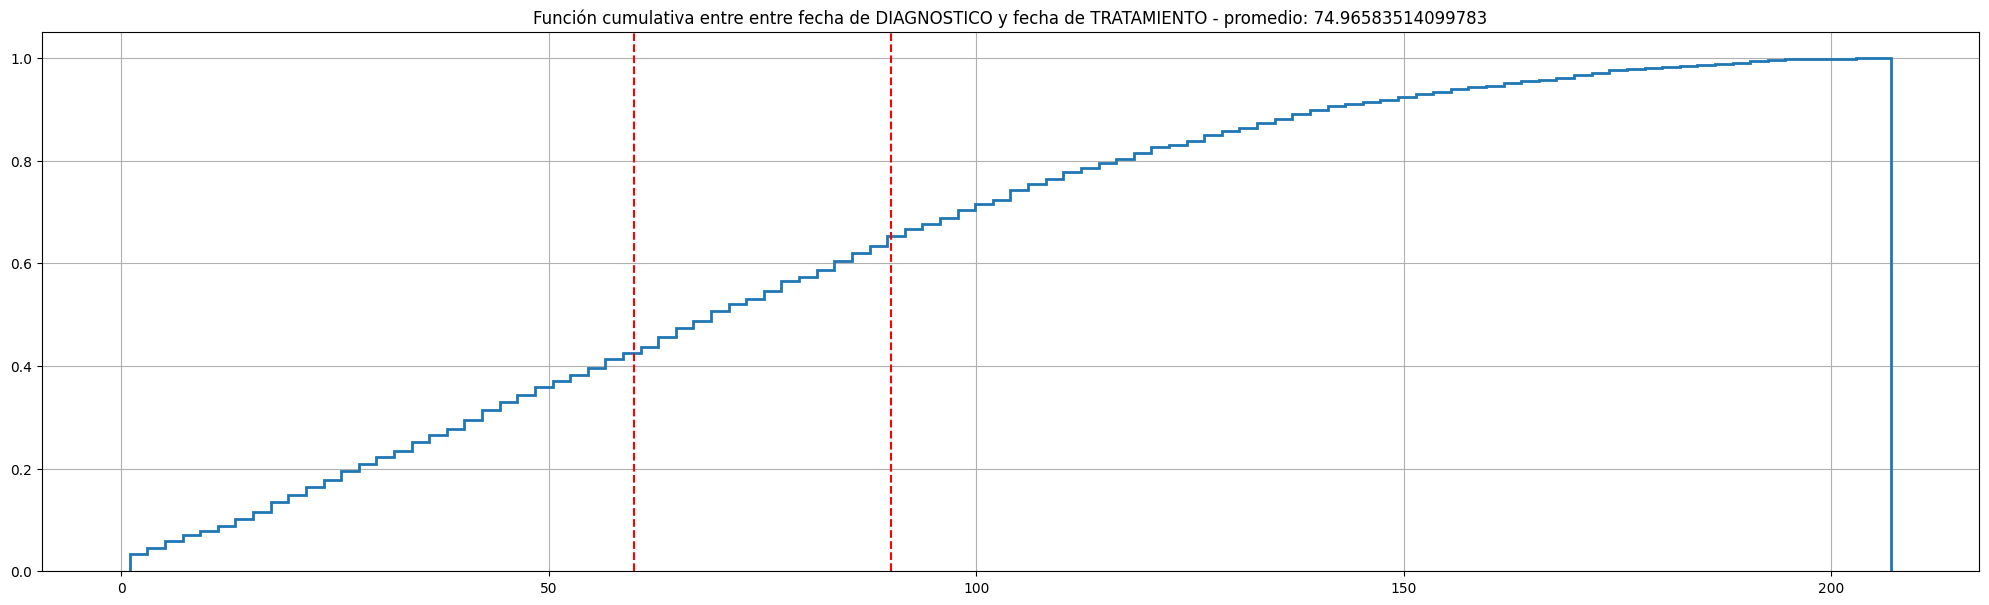

NameError: name 'df_CANCER_TRATAMIENTOS_SAMPLE_1' is not defined

In [93]:
for sheet in sheets[1:2]:
    print("Abriendo sheet:",sheet)
    tabla_cie10 = read_tabla_cancers(sheet)
    #print(tabla_cie10)
    List_tabla_cie10 = tabla_cie10.index.get_level_values(0).unique()
    print(List_tabla_cie10)
    dict_codigos = {}
    for etapa in List_tabla_cie10:
        dict_codigos[etapa] = tabla_cie10.loc[(etapa,slice(None)),].values.flatten().tolist()
    print(dict_codigos)
    for etapa in List_tabla_cie10:
        print("Etapa:", etapa)
        if etapa == "TAMIZAJE":
            df_CANCER_TAMIZAJE_SAMPLE = df_CANCER_TAMIZAJE[df_CANCER_TAMIZAJE["Diagnostico"].isin(dict_codigos[etapa])]
            #print(df_CANCER_TAMIZAJE_SAMPLE)
        if etapa == "BIOPSIA":
            df_CANCER_PROCEDIMIENTOS_SAMPLE = df_CANCER_PROCEDIMIENTOS[df_CANCER_PROCEDIMIENTOS["Diagnostico"].isin(dict_codigos[etapa])]
            #print(df_CANCER_PROCEDIMIENTOS_SAMPLE)
        if (etapa == "DIAGNOSTICO") | (sheet == "DIAGNÓSTICO"):
            df_CANCER_ATENDIDOS_SAMPLE = df_CANCER_ATENDIDOS[df_CANCER_ATENDIDOS["Diagnostico"].isin(dict_codigos[etapa])]
            #print(df_CANCER_ATENDIDOS_SAMPLE)
        if etapa == "TRATAMIENTO":
            df_CANCER_TRATAMIENTOS_SAMPLE = df_CANCER_TRATAMIENTOS[df_CANCER_TRATAMIENTOS["Diagnostico"].isin(dict_codigos[etapa])]
            #print(df_CANCER_TRATAMIENTOS_SAMPLE)
        if etapa == "TRATAMIENTO 1":
            df_CANCER_TRATAMIENTOS_SAMPLE_1 = df_CANCER_TRATAMIENTOS[df_CANCER_TRATAMIENTOS["Diagnostico"].isin(dict_codigos[etapa])]
            #print(df_CANCER_TRATAMIENTOS_SAMPLE_1)
        if etapa == "TRATAMIENTO 2":
            df_CANCER_TRATAMIENTOS_SAMPLE_2 = df_CANCER_TRATAMIENTOS[df_CANCER_TRATAMIENTOS["Diagnostico"].isin(dict_codigos[etapa])]
            #print(df_CANCER_TRATAMIENTOS_SAMPLE_2)
        # else:
        #     print("No existe etapa:", etapa)
        #     break
        # if df_CANCER_TAMIZAJE_SAMPLE exist and df_CANCER_PROCEDIMIENTOS_SAMPLE exist:
        if not df_CANCER_TAMIZAJE_SAMPLE.empty and not df_CANCER_PROCEDIMIENTOS_SAMPLE.empty:
            df_CANCER_TAM_BIO = df_CANCER_TAMIZAJE_SAMPLE.merge(df_CANCER_PROCEDIMIENTOS_SAMPLE[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_TAM","_BIO")).dropna()
            # create a new column calculating the difference between the two dates in months
            df_CANCER_TAM_BIO["Diferencia"] = (df_CANCER_TAM_BIO["Fecha_atencion_BIO"] - df_CANCER_TAM_BIO["Fecha_atencion_TAM"]).dt.days
            cdf_plot(df_CANCER_TAM_BIO, "TAMIZAJE", "BIOPSIA", "_TAM")
        if not df_CANCER_PROCEDIMIENTOS_SAMPLE.empty and not df_CANCER_ATENDIDOS_SAMPLE.empty:
            df_CANCER_BIO_DIAG = df_CANCER_PROCEDIMIENTOS_SAMPLE.merge(df_CANCER_ATENDIDOS_SAMPLE[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_BIO","_DIAG")).dropna()
            # create a new column calculating the difference between the two dates in months
            df_CANCER_BIO_DIAG["Diferencia"] = (df_CANCER_BIO_DIAG["Fecha_atencion_BIO"] - df_CANCER_BIO_DIAG["Fecha_atencion_TAM"]).dt.days
            cdf_plot(df_CANCER_BIO_DIAG, "BIOPSIA", "DIAGNOSTICO", "_BIO")
        if not df_CANCER_ATENDIDOS_SAMPLE.empty and not df_CANCER_TRATAMIENTOS_SAMPLE.empty:
            df_CANCER_DIAG_TRAT = df_CANCER_ATENDIDOS_SAMPLE.merge(df_CANCER_TRATAMIENTOS_SAMPLE[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_DIAG","_TRAT")).dropna()
            # create a new column calculating the difference between the two dates in months
            df_CANCER_DIAG_TRAT["Diferencia"] = (df_CANCER_DIAG_TRAT["Fecha_atencion_TRAT"] - df_CANCER_DIAG_TRAT["Fecha_atencion_DIAG"]).dt.days
            cdf_plot(df_CANCER_DIAG_TRAT, "DIAGNOSTICO", "TRATAMIENTO", "_DIAG")
        if not df_CANCER_ATENDIDOS_SAMPLE.empty and not df_CANCER_TRATAMIENTOS_SAMPLE_1.empty:
            df_CANCER_DIAG_TRAT1 = df_CANCER_ATENDIDOS_SAMPLE.merge(df_CANCER_TRATAMIENTOS_SAMPLE_1[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_DIAG","_TRAT1")).dropna()
            # create a new column calculating the difference between the two dates in months
            df_CANCER_DIAG_TRAT1["Diferencia"] = (df_CANCER_DIAG_TRAT1["Fecha_atencion_TRAT1"] - df_CANCER_DIAG_TRAT1["Fecha_atencion_DIAG"]).dt.days
            cdf_plot(df_CANCER_DIAG_TRAT1, "DIAGNOSTICO", "TRATAMIENTO1", "_DIAG")
        if not df_CANCER_ATENDIDOS_SAMPLE.empty and not df_CANCER_TRATAMIENTOS_SAMPLE_2.empty:
            df_CANCER_DIAG_TRAT2 = df_CANCER_ATENDIDOS_SAMPLE.merge(df_CANCER_TRATAMIENTOS_SAMPLE_2[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_DIAG","_TRAT2")).dropna()
            # create a new column calculating the difference between the two dates in months
            df_CANCER_DIAG_TRAT2["Diferencia"] = (df_CANCER_DIAG_TRAT2["Fecha_atencion_TRAT2"] - df_CANCER_DIAG_TRAT2["Fecha_atencion_DIAG"]).dt.days
            cdf_plot(df_CANCER_DIAG_TRAT2, "DIAGNOSTICO", "TRATAMIENTO2", "_DIAG")
        

    

In [95]:
if df_CANCER_TRATAMIENTOS_SAMPLE_1 is not None:
    print("Existe")

NameError: name 'df_CANCER_TRATAMIENTOS_SAMPLE_1' is not defined

In [73]:
df_CANCER_TAMIZAJE_SAMPLE is not None

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,Etapa,Year
2272332,6873771,62,A,F,373,2019-01-01,82270,D,1352,60a+,2019
272171,500943,61,A,F,1699,2019-01-01,82270,D,3137,60a+,2019
2226556,18775596,50,A,F,373,2019-01-01,82270,D,1352,30a-59a,2019
319574,861993,50,A,M,1719,2019-01-01,82270,D,3109,30a-59a,2019
257406,918409,87,A,F,1644,2019-01-01,82270,D,3268,60a+,2019
...,...,...,...,...,...,...,...,...,...,...,...
5070709,25935908,53,A,F,1247,2023-07-31,82270,D,4330,30a-59a,2023
634579,10684910,59,A,F,1243,2023-07-31,82270,D,4330,30a-59a,2023
1485094,14188363,60,A,F,338,2023-07-31,82270,D,1300,60a+,2023
1174562,8890219,52,A,M,1863,2023-07-31,82270,D,5562,30a-59a,2023


In [75]:
df_CANCER_TAMIZAJE[df_CANCER_TAMIZAJE["Diagnostico"].isin(dict_codigos[etapa])] is not None

True

In [71]:
df_CANCER_TAMIZAJE[df_CANCER_TAMIZAJE["Diagnostico"]=="77501.0"]

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,Etapa,Year


In [59]:
df_CANCER_TAMIZAJE[df_CANCER_TAMIZAJE["Diagnostico"].isin(dict_codigos[etapa])]

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,Etapa,Year


In [43]:
List_tabla_cie10

Index(['TAMIZAJE', 'BIOPSIA ', 'DIAGNÓSTICO', 'TRATAMIENTO 1',
       'TRATAMIENTO 2'],
      dtype='object', name='Etapa')

In [42]:
read_tabla_cancers(sheet)

Código CIE10
Etapa         Procedimientos/Diagnósticos                                    
TAMIZAJE      Citopatología Cervical o Vaginal y Tamizaje Man...        88141
              Inspección Visual con Ácido Acético (IVAA)            88141.01 
              Detección molecular del VPH                               87621
BIOPSIA       Colposcopia de Cérvix incluyendo la parte super...        57452
              Toma de Biopsia Exocervical.                              57500
              Toma de Biopsia Endocervical (Curetaje).                  58100
DIAGNÓSTICO   Tumor Maligno Endocervix (Adenocarcinoma).                 C530
              Tumor Maligno Exocervix (Carcinoma Epidermoide).           C531
              Tumor Maligno de Sitios Contiguos del Cuello de...        C538 
              Tumor Maligno del Cuello del Útero Sin Otra Esp...         C539
              N870 Displasia Cervical Leve / Neoplasia Intrae...         N870
              Displasia Cervical Moderada / Neoplasia Intraep...         N871
              Displasia Cervical Severa/Neoplasia Intraepitel...        N872 
              Hallazgos Anormales en Muestras Tomadas de Órga...         R876
              Carcinoma In Situ del Cuello del Útero parte no...         D069
TRATAMIENTO 1 96410 Administración de Quimioterapia Endovenos...        96410
              96421 Quimioterapia en Infusión (mayor a 4h)              96421
              96549 Otros tipos de Quimioterapia.                       96549
              77305 Radioterapia Externa.                               77305
              77501 Braquiterapia.                                      77501
TRATAMIENTO 2 Termocoagulación.                                         57510
              Crioterapia.                                              57511
              Cono Leep.                                                57522
              Cono Frio.                                                57520